In [12]:
import pandas as pd
import numpy as np
# 计算每对 q 和 alpha 参数对应的 TLP=0.01 时的 p 值，将其命名为 p_c，并保存为新的 CSV 文件 

# 读取数据
input_file = 'simulation_results.csv'  # 输入文件名
data = pd.read_csv(input_file)

# 保留两位小数
data['TLP'] = data['TLP'].round(2)
# 定义参数范围
q_values = [0, 0.15, 0.30, 0.5, 0.70, 0.85, 1]
alpha_values = [-10, -7, -5, -3, -1, 0, 1, 3, 5, 7, 10]

# 创建保存结果的列表
results = []

# 遍历每个q和alpha的组合
for q in q_values:
    for alpha in alpha_values:
        # 筛选出当前q和alpha组合的数据
        subset = data[(data['q'] == q) & (data['alpha'] == alpha)]
        
        # 找到TLP最接近0.01的行
        closest_row = subset.iloc[(subset['TLP'] - 0.01).abs().argsort()[:1]]
        
        # 提取对应的p值，q值，alpha值和TLP值
        if not closest_row.empty:
            p_c = closest_row['p'].values[0]
            TLP_value = closest_row['TLP'].values[0]
            results.append([q, alpha, p_c, TLP_value])

# 将结果保存为CSV文件
output_file = 'pc_results.csv'  # 输出文件名
results_df = pd.DataFrame(results, columns=['q', 'alpha', 'p_c', 'TLP'])
results_df.to_csv(r'D:\VS code\project\Fig02-06\result_pc.csv', index=False)

print(f'Results saved to {output_file}')


FileNotFoundError: [Errno 2] No such file or directory: 'simulation_results.csv'

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6172\1073588379.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  scatter = plt.scatter(df['q_virtual'], df['alpha_virtual'], c=colors, s=sizes, cmap='viridis', norm=norm)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6172\1073588379.py:64: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=plt.cm.viridis(norm(p_c)), alpha=0.6, s=size,


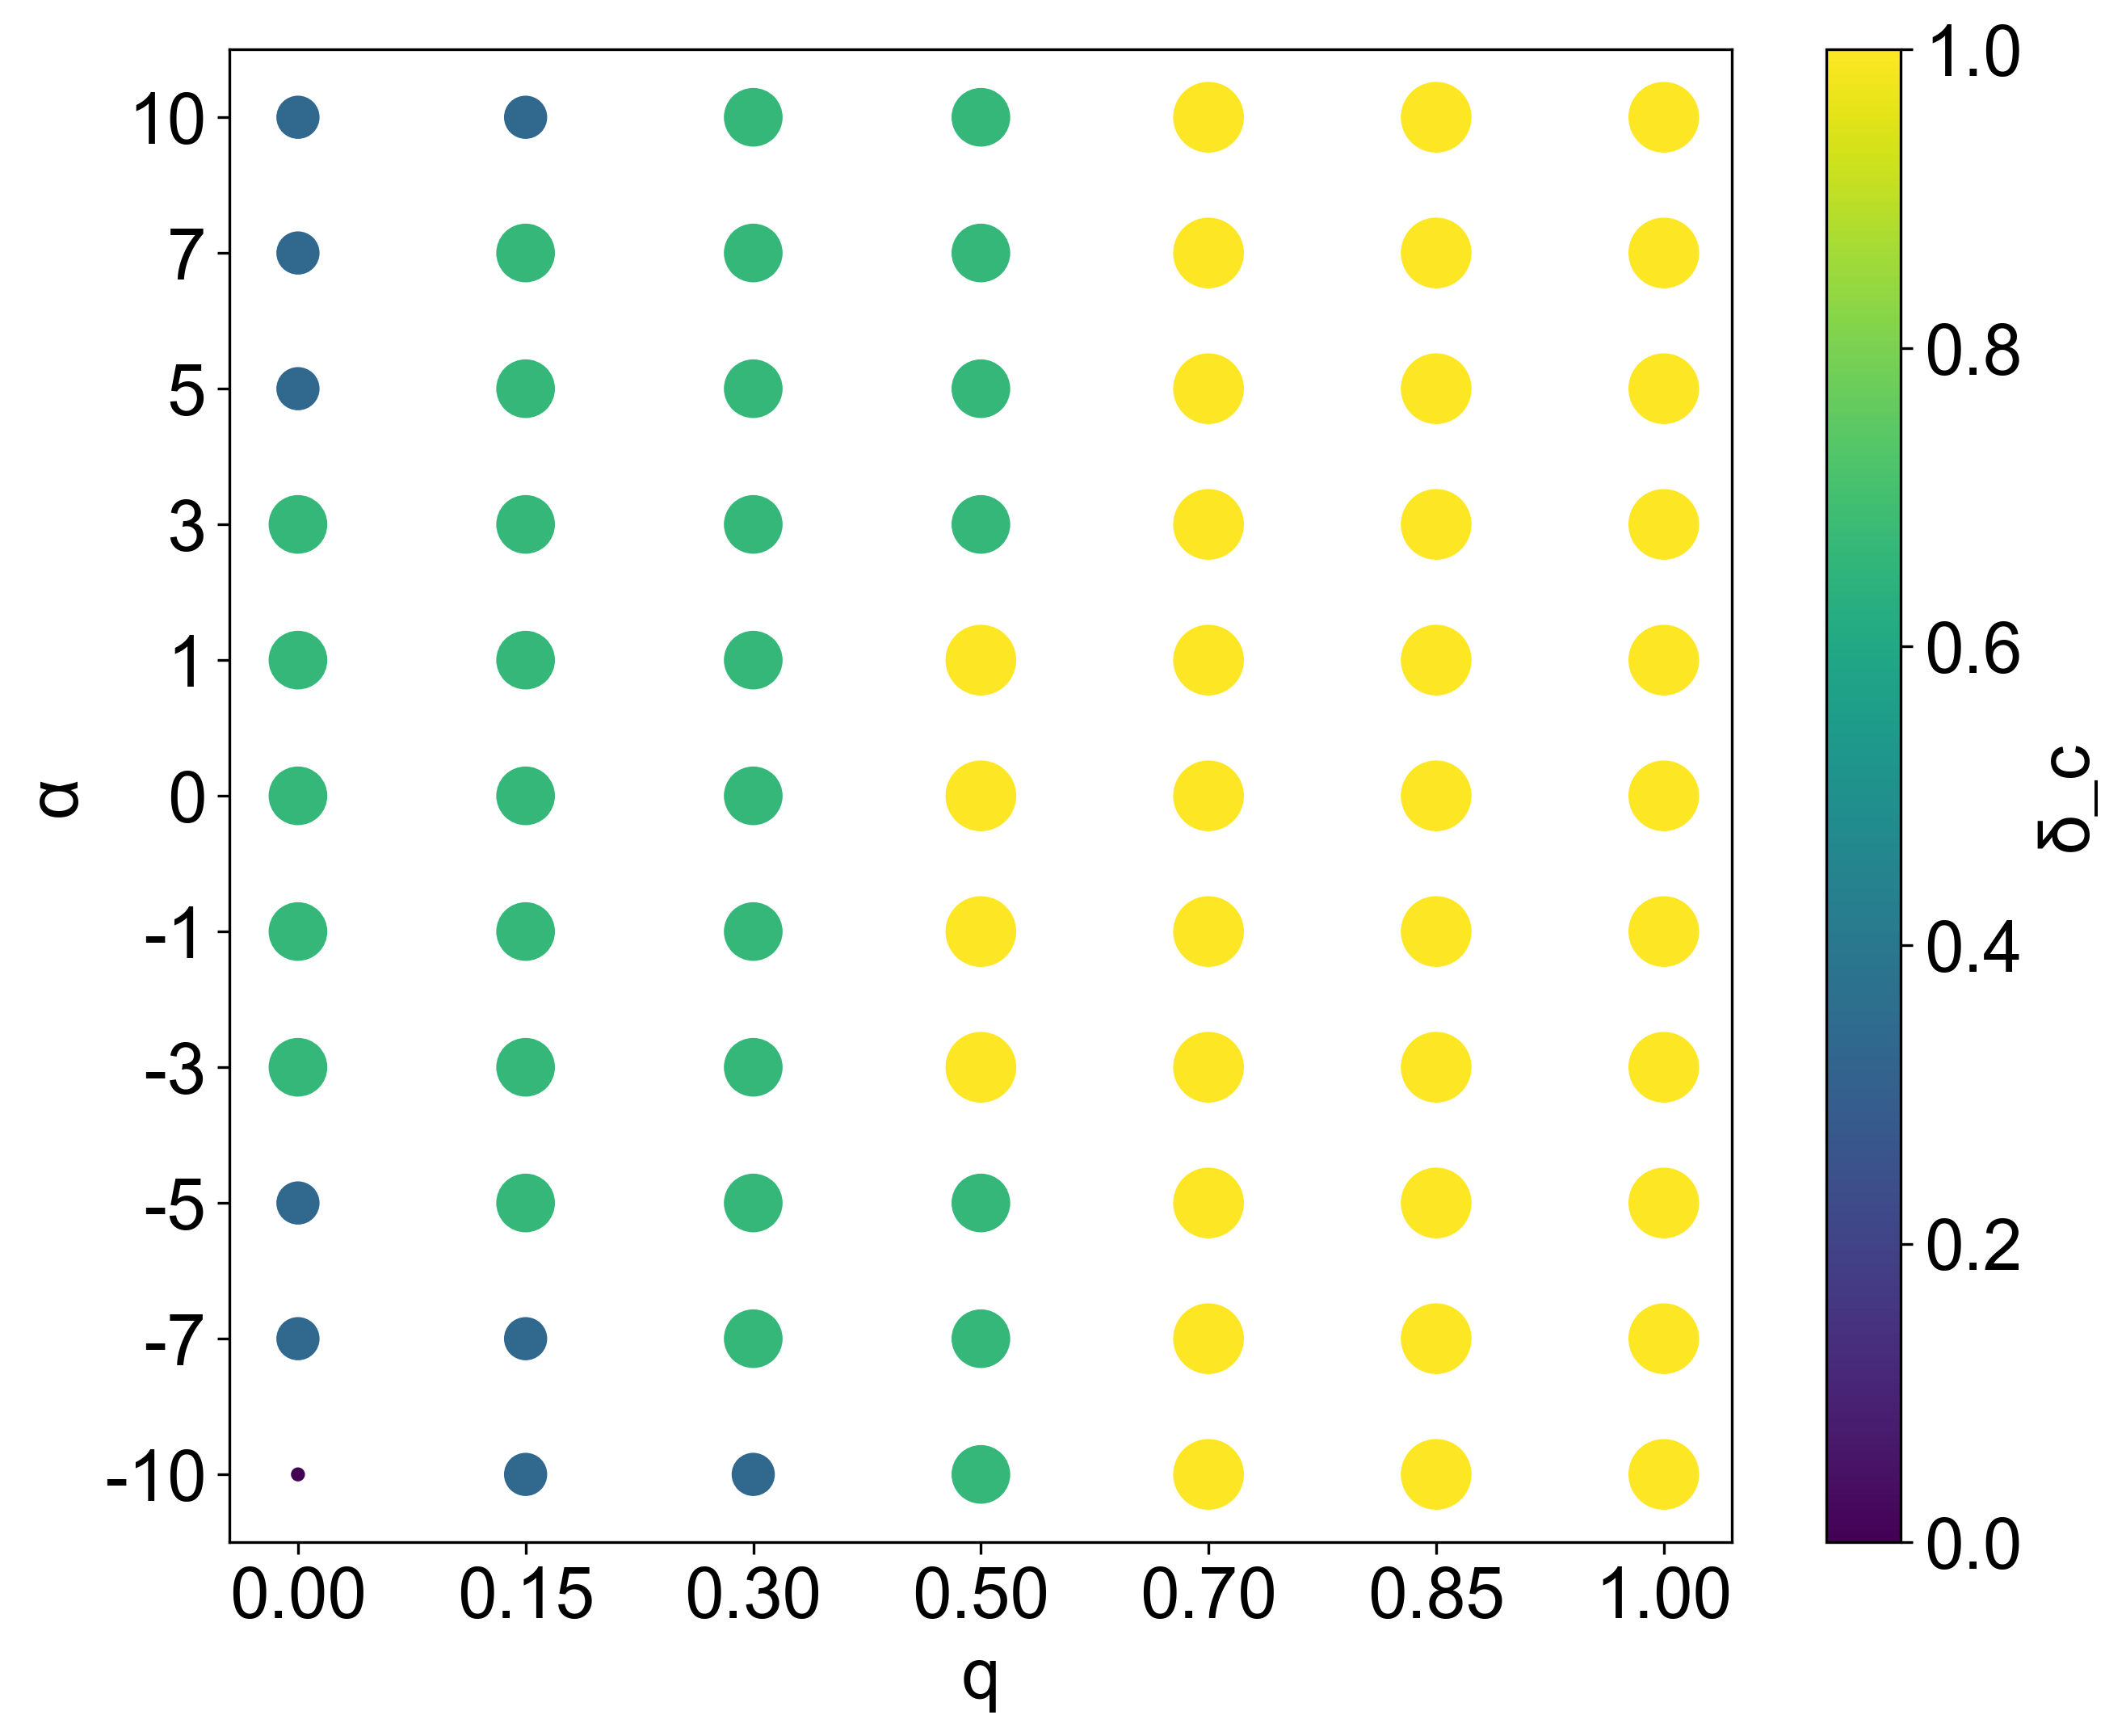

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 设置合适的字体以支持中文显示
plt.rcParams['font.family'] = ['Arial Unicode MS', 'Microsoft YaHei', 'SimHei', 'sans-serif']

# 读取CSV文件
df = pd.read_csv(r'D:\VS code\project\Fig02-06\result_pc.csv')

# 参数范围
q_values = [0, 0.15, 0.30, 0.5, 0.70, 0.85, 1]
alpha_values = [-10, -7, -5, -3, -1, 0, 1, 3, 5, 7, 10]

# 创建虚拟值映射
q_virtual = np.linspace(0, len(q_values)-1, len(q_values))
alpha_virtual = np.linspace(0, len(alpha_values)-1, len(alpha_values))

# 创建映射字典
q_mapping = dict(zip(q_values, q_virtual))
alpha_mapping = dict(zip(alpha_values, alpha_virtual))

# 将实际值转换为虚拟值
df['q_virtual'] = df['q'].map(q_mapping)
df['alpha_virtual'] = df['alpha'].map(alpha_mapping)

# 绘制临界点 pc 随 q 和 alpha 变化的二维图
plt.figure(figsize=(10, 8), dpi=300)  # 提高分辨率

# 设定点的大小和颜色映射
p_c_values = [290, 300, 310, 320]
min_size = 10
max_size = 400

# 使用p_c值构建norm对象
norm = plt.Normalize(min(p_c_values), max(p_c_values))

# 使用颜色映射
colors = plt.cm.viridis(norm(df['p_c']))

# 使用大小映射
sizes = min_size + (max_size - min_size) * norm(df['p_c'])

# 绘制散点图，颜色和大小同时变化
scatter = plt.scatter(df['q_virtual'], df['alpha_virtual'], c=colors, s=sizes, cmap='viridis', norm=norm)

# 设置图表标题和标签
plt.xlabel('q', fontsize=21)
plt.ylabel('α', fontsize=21)

# 设置刻度显示
plt.xticks(ticks=q_virtual, labels=[f'{x:.2f}' for x in q_values], fontsize=21)
plt.yticks(ticks=alpha_virtual, labels=[f'{y:.0f}' for y in alpha_values], fontsize=21)

# 添加颜色条
cbar = plt.colorbar(scatter)
cbar.set_label('δ_c', fontsize=21)
cbar.ax.tick_params(labelsize=21)

# 添加图例来说明点的大小表示数值大小
# 创建一个伪图例
for p_c in p_c_values:
    size = min_size + (max_size - min_size) * norm(p_c)
    plt.scatter([], [], c=plt.cm.viridis(norm(p_c)), alpha=0.6, s=size,
                label=f'{p_c:.2f}')

#plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='p_c (size)', fontsize=18, title_fontsize=18)
# 保存为PDF格式
plt.savefig(r'D:\VS code\project\Fig02-06\Fig06.pdf', format='pdf')
# 显示图像
plt.show()


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置合适的字体以支持中文显示
plt.rcParams['font.family'] = ['Arial Unicode MS', 'Microsoft YaHei', 'SimHei', 'sans-serif']

# 读取CSV文件
df = pd.read_csv(r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result.csv')

# 计算每个参数组合的均值
mean_df = df.groupby(['q', 'alpha', 'delta'], as_index=False).mean()  # 计算均值，返回新的 DataFrame

# 保留两位小数
mean_df['TLP'] = mean_df['TLP'].round(2)

# 定义参数范围
q_values = [0, 0.15, 0.30, 0.5, 0.70, 0.85, 1]
alpha_values = [-10, -7, -5, -3, -1, 0, 1, 3, 5, 7, 10]

# 创建保存结果的列表
results = []

# 遍历每个q和alpha的组合
for q in q_values:
    for alpha in alpha_values:
        # 筛选出当前q和alpha组合的数据
        subset = mean_df[(mean_df['q'] == q) & (mean_df['alpha'] == alpha)]
        
        # 按 delta 排序
        subset_sorted = subset.sort_values(by='delta')  # 按 delta 从小到大排序
        
        # 找到第一个 TLP >= 0.01 的行
        valid_row = subset_sorted[subset_sorted['TLP'] >= 0.01]  # 筛选出 TLP >= 0.01 的行
        
        if not valid_row.empty:
            delta_c = valid_row.iloc[0]['delta']  # 提取第一个符合条件的 delta 值
            TLP_value = valid_row.iloc[0]['TLP']  # 提取对应的 TLP 值
            results.append([q, alpha, delta_c, TLP_value])  # 保存结果

# 将结果保存为CSV文件
output_file = 'pc_results.csv'  # 输出文件名
results_df = pd.DataFrame(results, columns=['q', 'alpha', 'delta_c', 'TLP'])
results_df.to_csv(r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result_delta_c.csv', index=False)

print(f'Results saved to {output_file}')


Results saved to pc_results.csv


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12492\1322064315.py:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  scatter = plt.scatter(filtered_df['q_virtual'], filtered_df['alpha_virtual'], c=colors, s=sizes, cmap='viridis', norm=norm)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12492\1322064315.py:66: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=plt.cm.viridis(norm(delta_c)), alpha=0.6, s=size, label=f'{delta_c:.2f}')


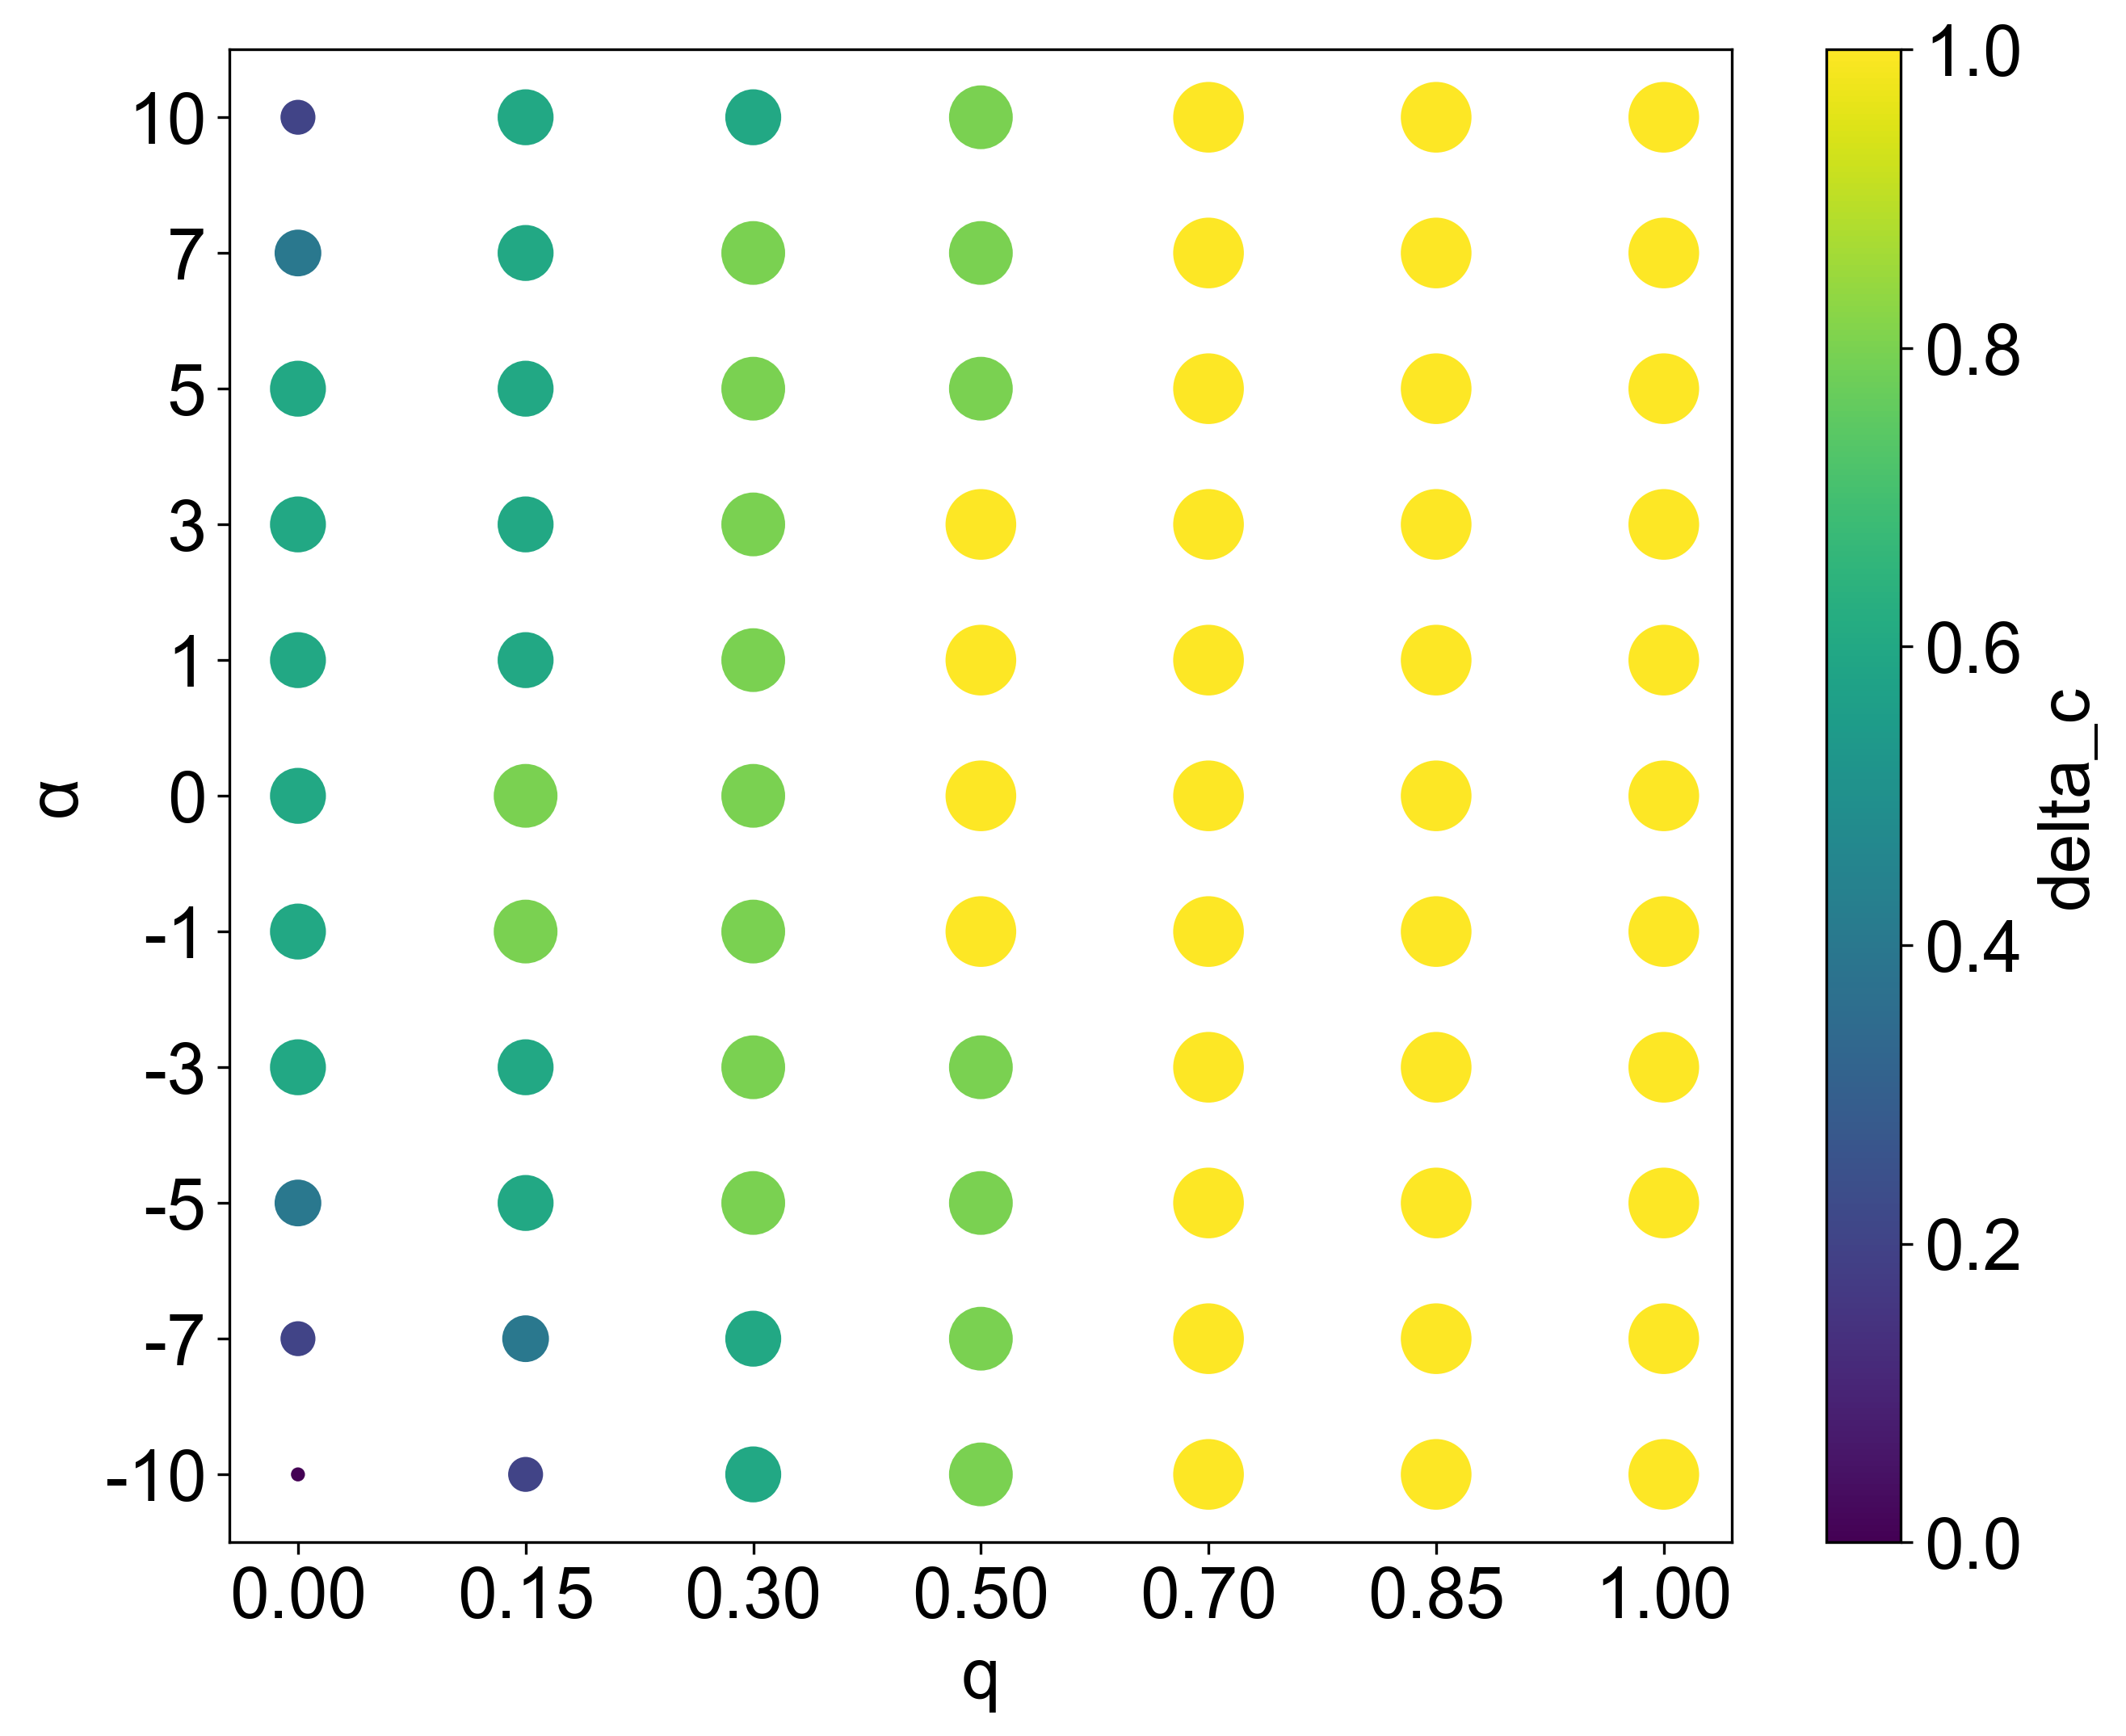

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 设置合适的字体以支持中文显示
plt.rcParams['font.family'] = ['Arial Unicode MS', 'Microsoft YaHei', 'SimHei', 'sans-serif']

# 读取CSV文件
df = pd.read_csv(r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result_delta_c.csv')

# 参数范围
q_values = [0, 0.15, 0.30, 0.5, 0.70, 0.85, 1]
alpha_values = [-10, -7, -5, -3, -1, 0, 1, 3, 5, 7, 10]

# 过滤出指定的 q 和 alpha 对应的行
filtered_df = df[df['q'].isin(q_values) & df['alpha'].isin(alpha_values)]

# 创建虚拟值映射
q_virtual = np.linspace(0, len(q_values)-1, len(q_values))
alpha_virtual = np.linspace(0, len(alpha_values)-1, len(alpha_values))

# 创建映射字典
q_mapping = dict(zip(q_values, q_virtual))
alpha_mapping = dict(zip(alpha_values, alpha_virtual))

# 将实际值转换为虚拟值
filtered_df['q_virtual'] = filtered_df['q'].map(q_mapping)
filtered_df['alpha_virtual'] = filtered_df['alpha'].map(alpha_mapping)

# 绘制临界点 delta_c 随 q 和 alpha 变化的二维图
plt.figure(figsize=(10, 8), dpi=300)  # 提高分辨率

# 设定点的大小和颜色映射
min_size = 10
max_size = 400

# 使用delta_c值构建norm对象
norm = plt.Normalize(filtered_df['delta_c'].min(), filtered_df['delta_c'].max())

# 使用颜色映射
colors = plt.cm.viridis(norm(filtered_df['delta_c']))

# 使用大小映射
sizes = min_size + (max_size - min_size) * norm(filtered_df['delta_c'])

# 绘制散点图，颜色和大小同时变化
scatter = plt.scatter(filtered_df['q_virtual'], filtered_df['alpha_virtual'], c=colors, s=sizes, cmap='viridis', norm=norm)

# 设置图表标题和标签
plt.xlabel('q', fontsize=21)
plt.ylabel('α', fontsize=21)

# 设置刻度显示
plt.xticks(ticks=q_virtual, labels=[f'{x:.2f}' for x in q_values], fontsize=21)
plt.yticks(ticks=alpha_virtual, labels=[f'{y:.0f}' for y in alpha_values], fontsize=21)

# 添加颜色条
cbar = plt.colorbar(scatter)
cbar.set_label('delta_c', fontsize=21)
cbar.ax.tick_params(labelsize=21)

# 添加图例来说明点的大小表示数值大小
delta_c_values = [filtered_df['delta_c'].min(), (filtered_df['delta_c'].min() + filtered_df['delta_c'].max())/2, filtered_df['delta_c'].max()]
for delta_c in delta_c_values:
    size = min_size + (max_size - min_size) * norm(delta_c)
    plt.scatter([], [], c=plt.cm.viridis(norm(delta_c)), alpha=0.6, s=size, label=f'{delta_c:.2f}')

#plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='delta_c (size)', fontsize=18, title_fontsize=18)

# 显示图像
plt.show()


Results saved to D:\VS code\project\Fig02-06\simulation_results\Fig06_result_delta_c.csv


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15032\2770959774.py:71: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  scatter = plt.scatter(filtered_df['q_virtual'], filtered_df['alpha_virtual'], c=colors, s=sizes, cmap='viridis', norm=norm)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15032\2770959774.py:88: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=plt.cm.viridis(norm(delta_c)), alpha=0.6, s=size, label=f'{delta_c:.2f}')


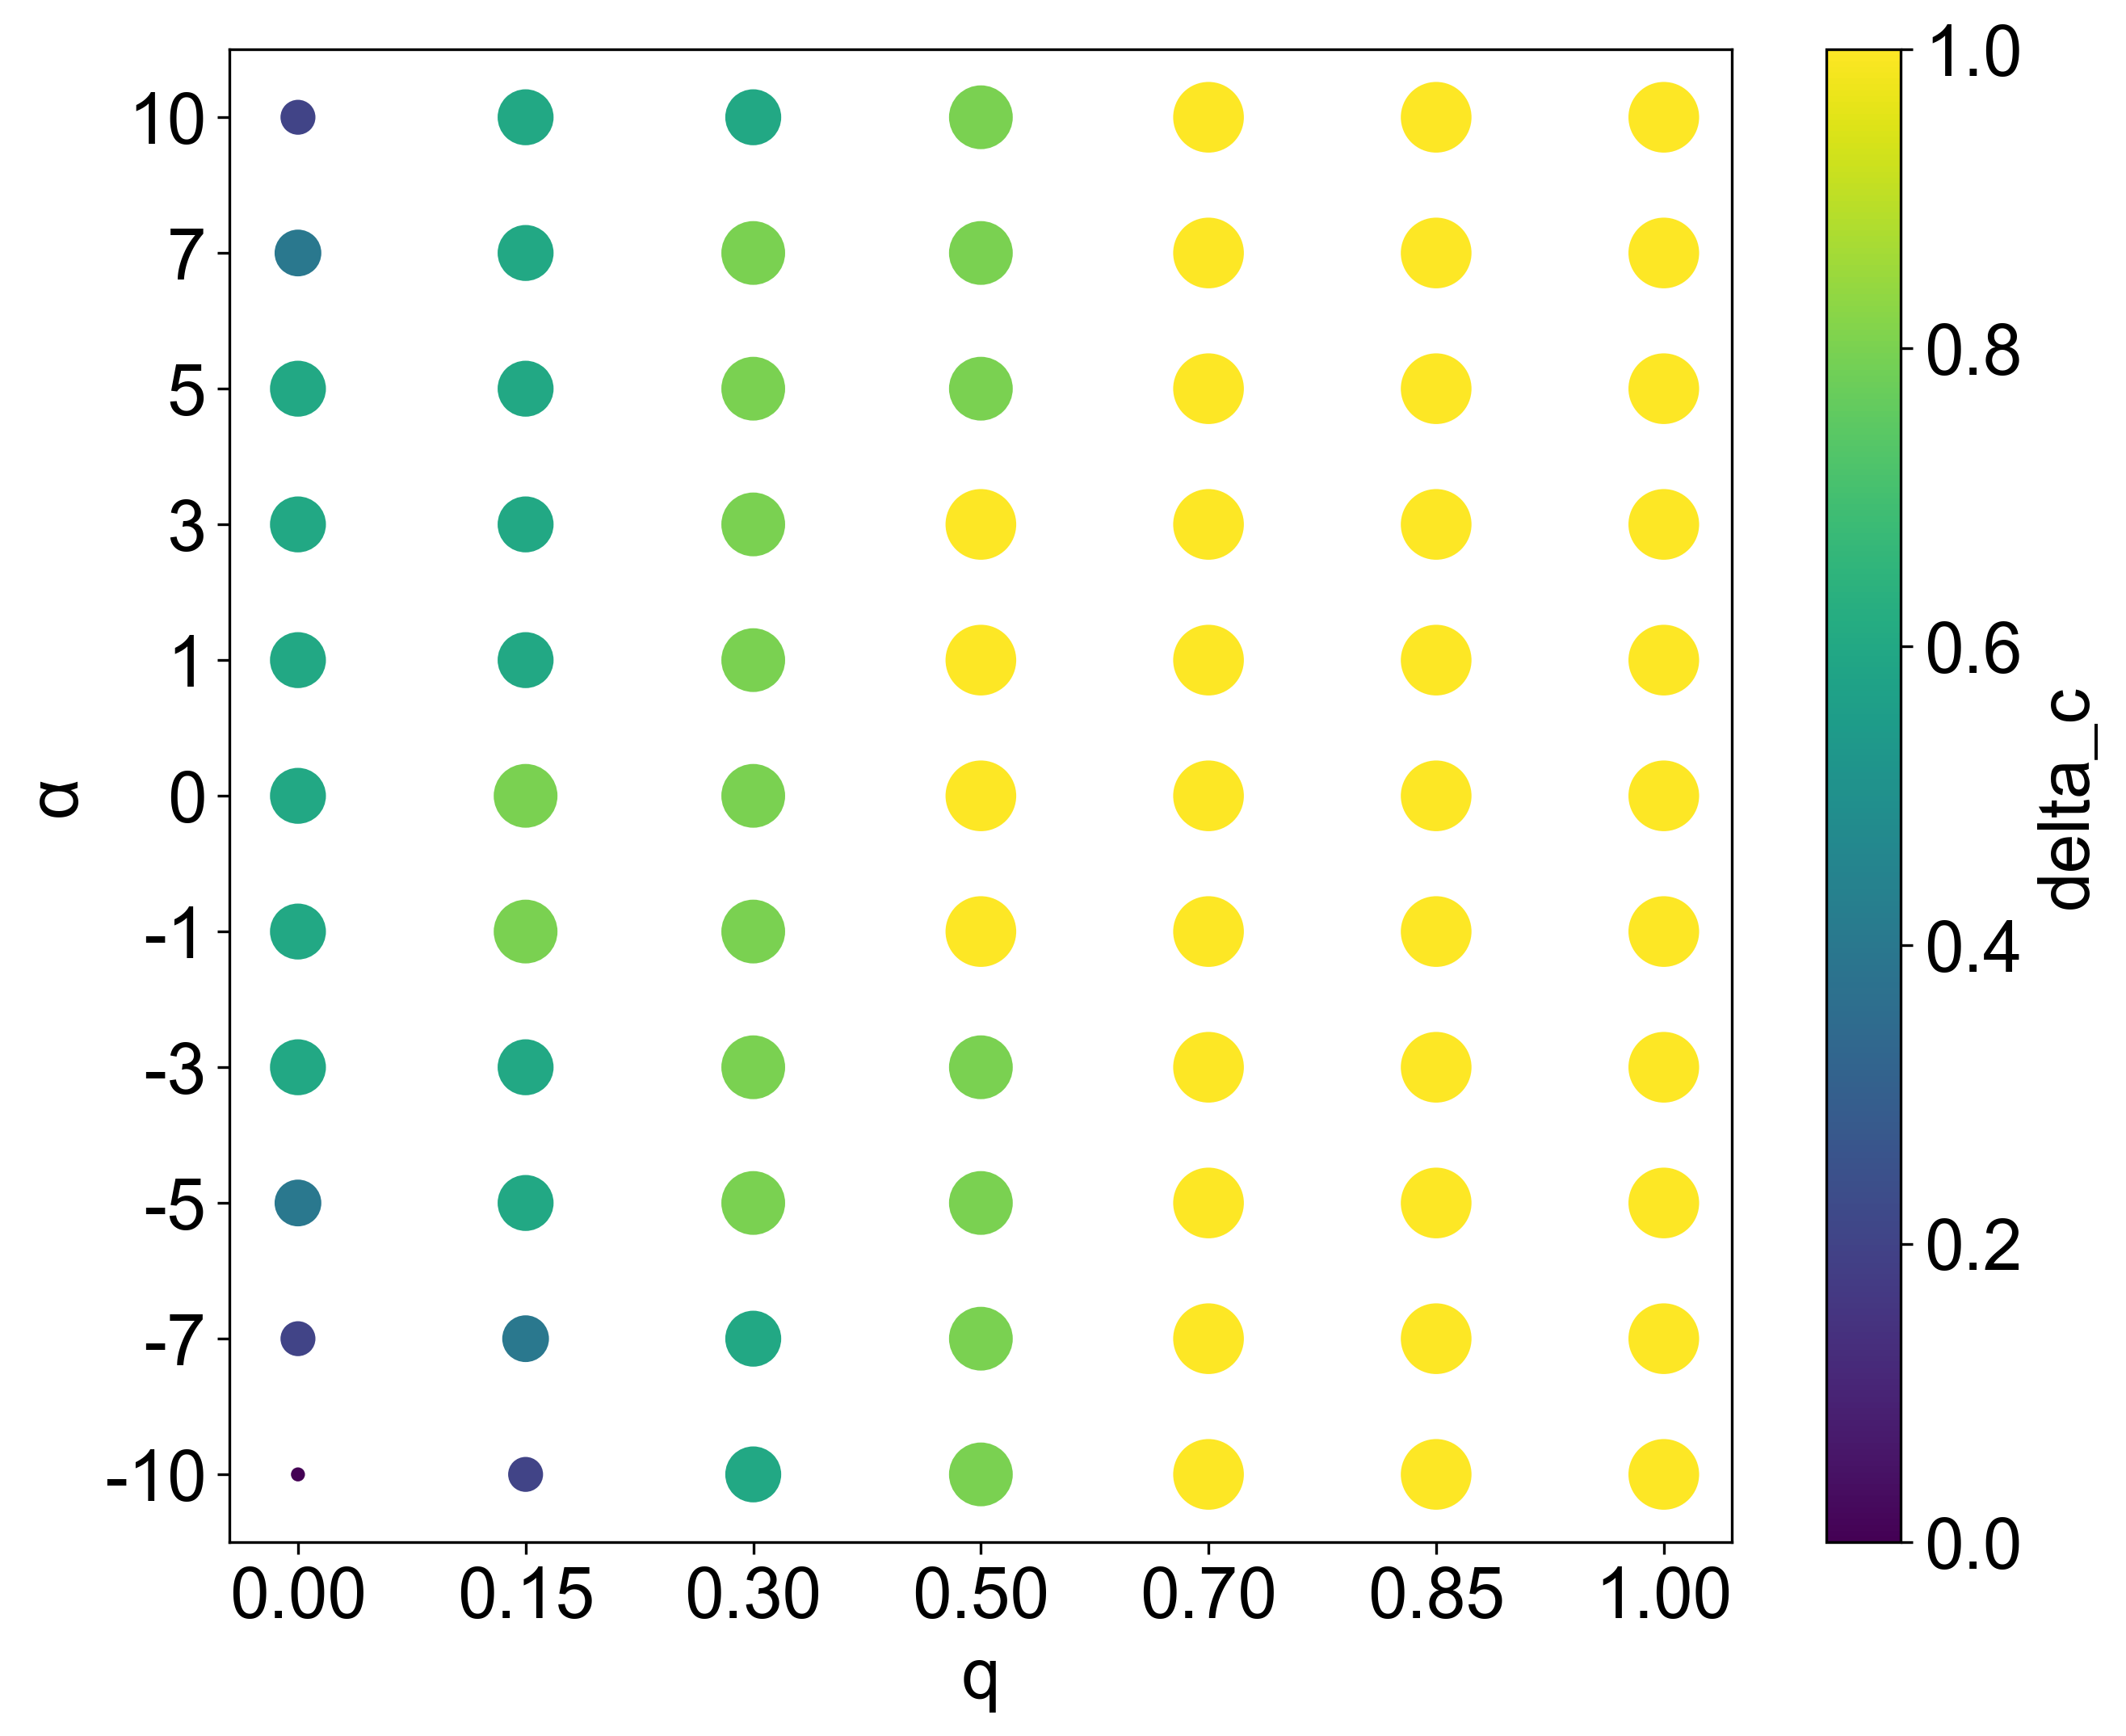

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置合适的字体以支持中文显示
plt.rcParams['font.family'] = ['Arial Unicode MS', 'Microsoft YaHei', 'SimHei', 'sans-serif']

# 第一步：读取CSV文件并计算均值
df = pd.read_csv(r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result.csv')

# 计算每个参数组合的均值
mean_df = df.groupby(['q', 'alpha', 'delta'], as_index=False).mean()

# 保留两位小数
mean_df['TLP'] = mean_df['TLP'].round(2)

# 定义参数范围
q_values = [0, 0.15, 0.30, 0.5, 0.70, 0.85, 1]
alpha_values = [-10, -7, -5, -3, -1, 0, 1, 3, 5, 7, 10]

# 创建保存结果的列表
results = []

# 遍历每个q和alpha的组合，筛选满足条件的数据
for q in q_values:
    for alpha in alpha_values:
        subset = mean_df[(mean_df['q'] == q) & (mean_df['alpha'] == alpha)]
        subset_sorted = subset.sort_values(by='delta')
        valid_row = subset_sorted[subset_sorted['TLP'] >= 0.01]
        
        if not valid_row.empty:
            delta_c = valid_row.iloc[0]['delta']
            TLP_value = valid_row.iloc[0]['TLP']
            results.append([q, alpha, delta_c, TLP_value])

# 将结果保存为CSV文件
results_df = pd.DataFrame(results, columns=['q', 'alpha', 'delta_c', 'TLP'])
output_file = r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result_delta_c.csv'
results_df.to_csv(output_file, index=False)
print(f'Results saved to {output_file}')

# 第二步：读取保存后的CSV文件，进行可视化
df = pd.read_csv(output_file)

# 过滤出指定的 q 和 alpha 对应的行
filtered_df = df[df['q'].isin(q_values) & df['alpha'].isin(alpha_values)]

# 创建虚拟值映射
q_virtual = np.linspace(0, len(q_values) - 1, len(q_values))
alpha_virtual = np.linspace(0, len(alpha_values) - 1, len(alpha_values))

# 创建映射字典
q_mapping = dict(zip(q_values, q_virtual))
alpha_mapping = dict(zip(alpha_values, alpha_virtual))

# 将实际值转换为虚拟值
filtered_df['q_virtual'] = filtered_df['q'].map(q_mapping)
filtered_df['alpha_virtual'] = filtered_df['alpha'].map(alpha_mapping)

# 绘制临界点 delta_c 随 q 和 alpha 变化的二维图
plt.figure(figsize=(10, 8), dpi=300)

# 设定点的大小和颜色映射
min_size = 10
max_size = 400
norm = plt.Normalize(filtered_df['delta_c'].min(), filtered_df['delta_c'].max())
colors = plt.cm.viridis(norm(filtered_df['delta_c']))
sizes = min_size + (max_size - min_size) * norm(filtered_df['delta_c'])

# 绘制散点图
scatter = plt.scatter(filtered_df['q_virtual'], filtered_df['alpha_virtual'], c=colors, s=sizes, cmap='viridis', norm=norm)

# 设置图表标题和标签
plt.xlabel('q', fontsize=21)
plt.ylabel('α', fontsize=21)
plt.xticks(ticks=q_virtual, labels=[f'{x:.2f}' for x in q_values], fontsize=21)
plt.yticks(ticks=alpha_virtual, labels=[f'{y:.0f}' for y in alpha_values], fontsize=21)

# 添加颜色条
cbar = plt.colorbar(scatter)
cbar.set_label('delta_c', fontsize=21)
cbar.ax.tick_params(labelsize=21)

# 添加图例说明点的大小
delta_c_values = [filtered_df['delta_c'].min(), (filtered_df['delta_c'].min() + filtered_df['delta_c'].max()) / 2, filtered_df['delta_c'].max()]
for delta_c in delta_c_values:
    size = min_size + (max_size - min_size) * norm(delta_c)
    plt.scatter([], [], c=plt.cm.viridis(norm(delta_c)), alpha=0.6, s=size, label=f'{delta_c:.2f}')

# 显示图像
plt.show()


Results saved to Fig06_result_delta_c_m1.csv
Results saved to Fig06_result_delta_c_m4.csv
Results saved to Fig06_result_delta_c_m10.csv


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15032\2893592762.py:78: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  scatter = ax.scatter(df['q_virtual'], df['alpha_virtual'],
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15032\2893592762.py:78: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  scatter = ax.scatter(df['q_virtual'], df['alpha_virtual'],
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15032\2893592762.py:78: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  scatter = ax.scatter(df['q_virtual'], df['alpha_virtual'],


Plot saved as Fig06_result_plot_m.pdf


Results saved to Fig06_result_delta_c_k4.csv
Results saved to Fig06_result_delta_c_k10.csv
Results saved to Fig06_result_delta_c_k50.csv


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15032\2893592762.py:78: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  scatter = ax.scatter(df['q_virtual'], df['alpha_virtual'],
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15032\2893592762.py:78: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  scatter = ax.scatter(df['q_virtual'], df['alpha_virtual'],
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15032\2893592762.py:78: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  scatter = ax.scatter(df['q_virtual'], df['alpha_virtual'],


Plot saved as Fig06_result_plot_k.pdf


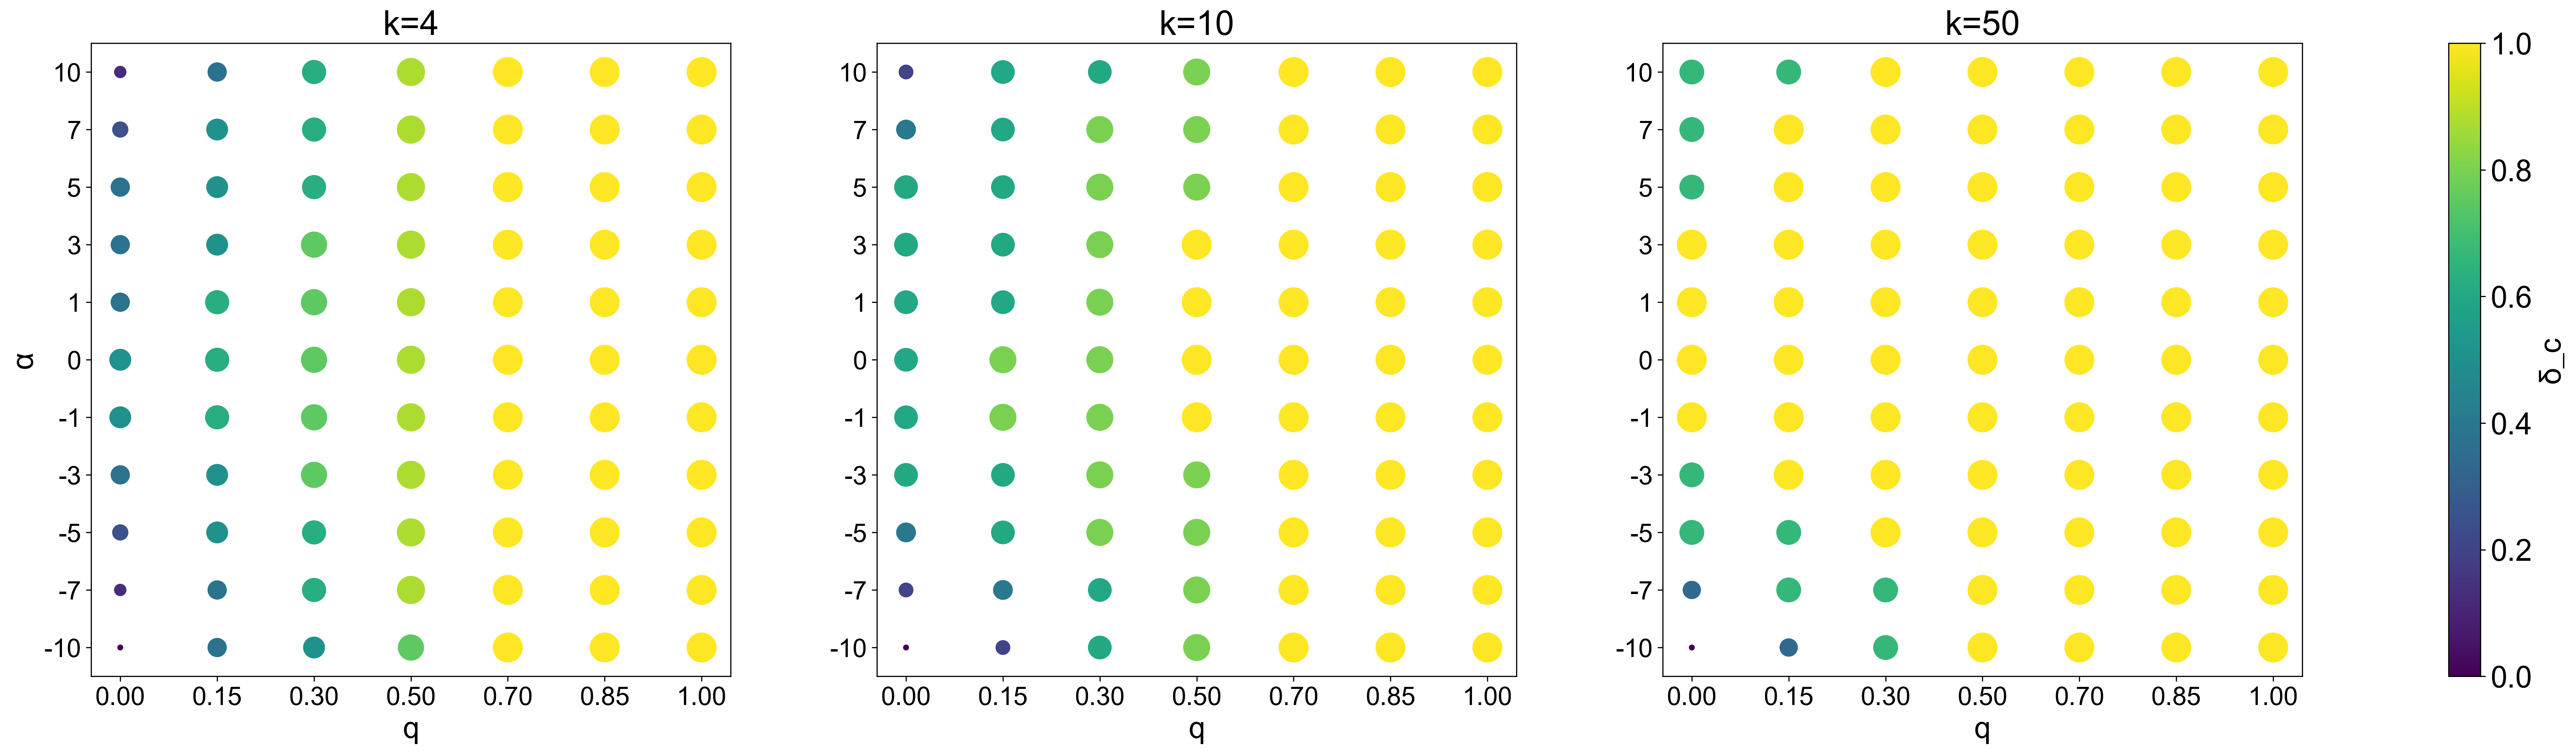

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

# 设置字体，支持中文显示
plt.rcParams['font.family'] = ['Arial Unicode MS', 'Microsoft YaHei', 'SimHei', 'sans-serif']

# 定义函数：处理数据并保存 delta_c 结果到 CSV 文件
def process_data(input_csv, output_csv):
    df = pd.read_csv(input_csv)

    # 计算每个参数组合的均值
    mean_df = df.groupby(['q', 'alpha', 'delta'], as_index=False).mean()

    # 保留两位小数
    mean_df['TLP'] = mean_df['TLP'].round(2)

    # 定义参数范围
    q_values = [0, 0.15, 0.30, 0.5, 0.70, 0.85, 1]
    alpha_values = [-10, -7, -5, -3, -1, 0, 1, 3, 5, 7, 10]

    # 创建保存结果的列表
    results = []

    # 遍历每个q和alpha的组合，筛选满足条件的数据
    for q in q_values:
        for alpha in alpha_values:
            subset = mean_df[(mean_df['q'] == q) & (mean_df['alpha'] == alpha)]
            subset_sorted = subset.sort_values(by='delta')
            valid_row = subset_sorted[subset_sorted['TLP'] >= 0.01]
            
            if not valid_row.empty:
                delta_c = valid_row.iloc[0]['delta']
                TLP_value = valid_row.iloc[0]['TLP']
                results.append([q, alpha, delta_c, TLP_value])

    # 将结果保存为CSV文件
    results_df = pd.DataFrame(results, columns=['q', 'alpha', 'delta_c', 'TLP'])
    results_df.to_csv(output_csv, index=False)
    print(f'Results saved to {output_csv}')

# 定义函数：读取 delta_c 数据并绘制图像
def plot_subplots(data_files, params, param_type, title, output_image):
    fig = plt.figure(figsize=(30, 8), dpi=300)
    
    # 使用 gridspec 确保所有子图同样大小，并为颜色条留出空间
    gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 0.05], wspace=0.3)

    # 定义参数范围
    q_values = [0, 0.15, 0.30, 0.5, 0.70, 0.85, 1]
    alpha_values = [-10, -7, -5, -3, -1, 0, 1, 3, 5, 7, 10]

    # 创建虚拟值映射
    q_virtual = np.linspace(0, len(q_values) - 1, len(q_values))
    alpha_virtual = np.linspace(0, len(alpha_values) - 1, len(alpha_values))

    # 创建映射字典
    q_mapping = dict(zip(q_values, q_virtual))
    alpha_mapping = dict(zip(alpha_values, alpha_virtual))

    for idx, (file, param) in enumerate(zip(data_files, params)):
        df = pd.read_csv(file)

        # 将实际值转换为虚拟值
        df['q_virtual'] = df['q'].map(q_mapping)
        df['alpha_virtual'] = df['alpha'].map(alpha_mapping)

        # 设置点的大小和颜色映射
        min_size = 10
        max_size = 400
        norm = plt.Normalize(df['delta_c'].min(), df['delta_c'].max())
        colors = plt.cm.viridis(norm(df['delta_c']))
        sizes = min_size + (max_size - min_size) * norm(df['delta_c'])

        ax = fig.add_subplot(gs[idx])

        scatter = ax.scatter(df['q_virtual'], df['alpha_virtual'], 
                             c=colors, s=sizes, cmap='viridis', norm=norm)

        # 设置子图标题
        ax.set_title(f'{param_type}={param}', fontsize=24)

        # 设置x轴和y轴标签
        ax.set_xlabel('q', fontsize=21)
        if idx == 0:
            ax.set_ylabel('α', fontsize=21)
        ax.set_xticks(ticks=q_virtual)
        ax.set_xticklabels([f'{x:.2f}' for x in q_values], fontsize=18)
        ax.set_yticks(ticks=alpha_virtual)
        ax.set_yticklabels([f'{y:.0f}' for y in alpha_values], fontsize=18)

    # 设置统一的颜色条
    cbar_ax = fig.add_subplot(gs[-1])  # 最右边添加颜色条
    cbar = fig.colorbar(scatter, cax=cbar_ax)
    cbar.set_label('δ_c', fontsize=21)
    cbar.ax.tick_params(labelsize=21)
    

    # 设置全局标题
    #fig.suptitle(title, fontsize=28)

    # 保存图像

    plt.savefig(output_image, format='pdf', bbox_inches='tight')
    print(f'Plot saved as {output_image}')
    plt.show()

# 调用函数生成图像
# m 参数影响的大图（包含 m=1, m=4, m=10）
file_m1 = r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result(m=1).csv'
file_m4 = r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result.csv'  # 基线 m=4
file_m10 = r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result(m=10).csv'

# 生成 delta_c 数据
for file, m in zip([file_m1, file_m4, file_m10], [1, 4, 10]):
    output_csv = f'Fig06_result_delta_c_m{m}.csv'
    process_data(file, output_csv)

# 绘制 m 参数影响的子图
plot_subplots(
    data_files=[f'Fig06_result_delta_c_m1.csv', f'Fig06_result_delta_c_m4.csv', f'Fig06_result_delta_c_m10.csv'],
    params=[1, 4, 10],
    param_type='m',
    title='Effect of m on delta_c',
    output_image='Fig06_result_plot_m.pdf'
)

# k 参数影响的大图（包含 k=4, k=10, k=50）
file_k4 = r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result(k=4).csv'
file_k10 = r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result.csv'  # 基线 k=10
file_k50 = r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result(k=50).csv'

# 生成 delta_c 数据
for file, k in zip([file_k4, file_k10, file_k50], [4, 10, 50]):
    output_csv = f'Fig06_result_delta_c_k{k}.csv'
    process_data(file, output_csv)

# 绘制 k 参数影响的子图
plot_subplots(
    data_files=[f'Fig06_result_delta_c_k4.csv', f'Fig06_result_delta_c_k10.csv', f'Fig06_result_delta_c_k50.csv'],
    params=[4, 10, 50],
    param_type='k',
    title='Effect of k on delta_c',
    output_image='Fig06_result_plot_k.pdf'
)


Results saved to Fig06_result_delta_c_m1.csv
Results saved to Fig06_result_delta_c_m4.csv
Results saved to Fig06_result_delta_c_m10.csv
Results saved to Fig06_result_delta_c_k4.csv
Results saved to Fig06_result_delta_c_k10.csv
Results saved to Fig06_result_delta_c_k50.csv


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15032\1826906159.py:78: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  scatter = ax.scatter(df['q_virtual'], df['alpha_virtual'],
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15032\1826906159.py:78: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  scatter = ax.scatter(df['q_virtual'], df['alpha_virtual'],
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15032\1826906159.py:78: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  scatter = ax.scatter(df['q_virtual'], df['alpha_virtual'],
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15032\1826906159.py:78: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  scatter = ax.scatter(df['q_virtual'], df['alpha_virtual'],
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15032\18

Plot saved as Fig06_result_combined_plot.pdf


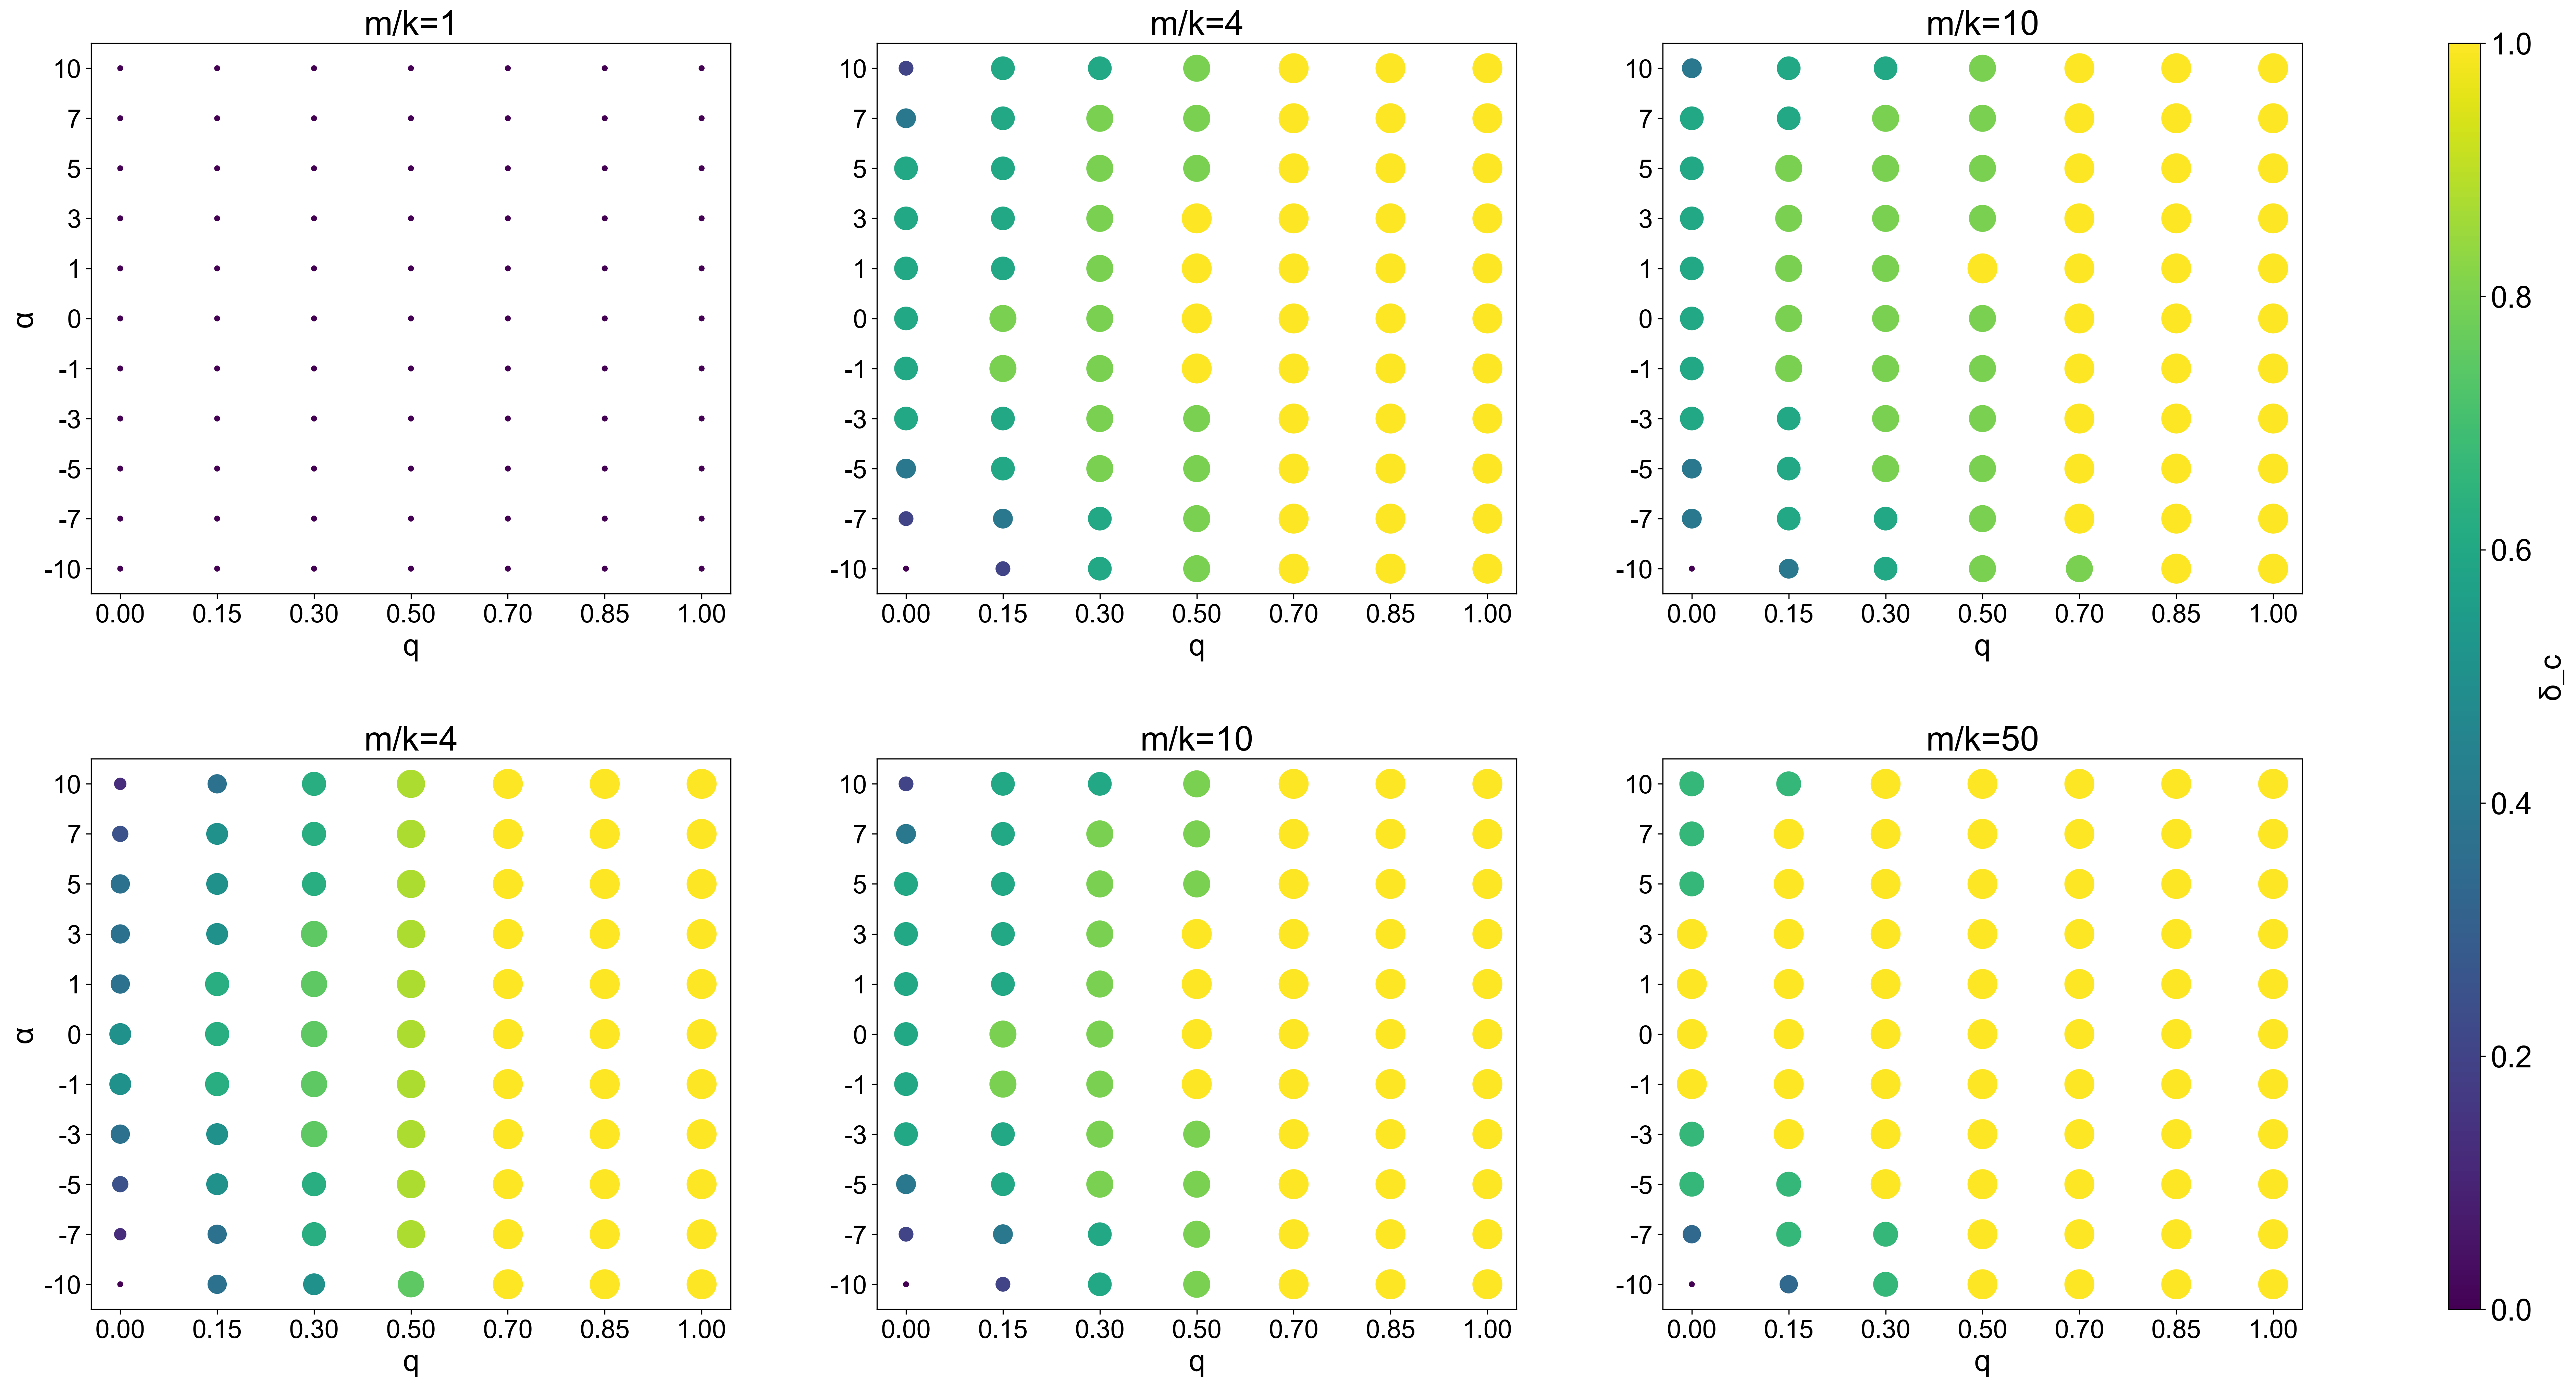

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

# 设置字体，支持中文显示
plt.rcParams['font.family'] = ['Arial Unicode MS', 'Microsoft YaHei', 'SimHei', 'sans-serif']

# 定义函数：处理数据并保存 delta_c 结果到 CSV 文件
def process_data(input_csv, output_csv):
    df = pd.read_csv(input_csv)

    # 计算每个参数组合的均值
    mean_df = df.groupby(['q', 'alpha', 'delta'], as_index=False).mean()

    # 保留两位小数
    mean_df['TLP'] = mean_df['TLP'].round(2)

    # 定义参数范围
    q_values = [0, 0.15, 0.30, 0.5, 0.70, 0.85, 1]
    alpha_values = [-10, -7, -5, -3, -1, 0, 1, 3, 5, 7, 10]

    # 创建保存结果的列表
    results = []

    # 遍历每个q和alpha的组合，筛选满足条件的数据
    for q in q_values:
        for alpha in alpha_values:
            subset = mean_df[(mean_df['q'] == q) & (mean_df['alpha'] == alpha)]
            subset_sorted = subset.sort_values(by='delta')
            valid_row = subset_sorted[subset_sorted['TLP'] >= 0.01]
            
            if not valid_row.empty:
                delta_c = valid_row.iloc[0]['delta']
                TLP_value = valid_row.iloc[0]['TLP']
                results.append([q, alpha, delta_c, TLP_value])

    # 将结果保存为CSV文件
    results_df = pd.DataFrame(results, columns=['q', 'alpha', 'delta_c', 'TLP'])
    results_df.to_csv(output_csv, index=False)
    print(f'Results saved to {output_csv}')

# 定义函数：读取 delta_c 数据并绘制图像
def plot_subplots(data_files, params, param_type, output_image):
    fig = plt.figure(figsize=(30, 16), dpi=300)
    
    # 使用 gridspec 创建 2 行 3 列的子图布局，并为颜色条留出空间
    gs = gridspec.GridSpec(2, 4, width_ratios=[1, 1, 1, 0.05], wspace=0.3, hspace=0.3)

    # 定义参数范围
    q_values = [0, 0.15, 0.30, 0.5, 0.70, 0.85, 1]
    alpha_values = [-10, -7, -5, -3, -1, 0, 1, 3, 5, 7, 10]

    # 创建虚拟值映射
    q_virtual = np.linspace(0, len(q_values) - 1, len(q_values))
    alpha_virtual = np.linspace(0, len(alpha_values) - 1, len(alpha_values))

    # 创建映射字典
    q_mapping = dict(zip(q_values, q_virtual))
    alpha_mapping = dict(zip(alpha_values, alpha_virtual))

    for idx, (file, param) in enumerate(zip(data_files, params)):
        df = pd.read_csv(file)

        # 将实际值转换为虚拟值
        df['q_virtual'] = df['q'].map(q_mapping)
        df['alpha_virtual'] = df['alpha'].map(alpha_mapping)

        # 设置点的大小和颜色映射
        min_size = 10
        max_size = 400
        norm = plt.Normalize(df['delta_c'].min(), df['delta_c'].max())
        colors = plt.cm.viridis(norm(df['delta_c']))
        sizes = min_size + (max_size - min_size) * norm(df['delta_c'])

        ax = fig.add_subplot(gs[idx // 3, idx % 3])

        scatter = ax.scatter(df['q_virtual'], df['alpha_virtual'], 
                             c=colors, s=sizes, cmap='viridis', norm=norm)

        # 设置子图标题
        ax.set_title(f'{param_type}={param}', fontsize=24)

        # 设置x轴和y轴标签
        ax.set_xlabel('q', fontsize=21)
        if idx % 3 == 0:
            ax.set_ylabel('α', fontsize=21)
        ax.set_xticks(ticks=q_virtual)
        ax.set_xticklabels([f'{x:.2f}' for x in q_values], fontsize=18)
        ax.set_yticks(ticks=alpha_virtual)
        ax.set_yticklabels([f'{y:.0f}' for y in alpha_values], fontsize=18)

    # 设置统一的颜色条
    cbar_ax = fig.add_subplot(gs[:, -1])  # 右边两行添加一个共享颜色条
    cbar = fig.colorbar(scatter, cax=cbar_ax)
    cbar.set_label('δ_c', fontsize=21)
    cbar.ax.tick_params(labelsize=21)

    # 保存图像
    plt.savefig(output_image, format='pdf', bbox_inches='tight')
    print(f'Plot saved as {output_image}')
    plt.show()

# 调用函数生成合并图像

# m 参数影响的大图（包含 m=1, m=4, m=10）
file_m1 = r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result(m=1).csv'
file_m4 = r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result.csv'  # 基线 m=4
file_m10 = r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result(m=10).csv'

# k 参数影响的大图（包含 k=4, k=10, k=50）
file_k4 = r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result(k=4).csv'
file_k10 = r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result.csv'  # 基线 k=10
file_k50 = r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result(k=50).csv'

# 生成 delta_c 数据
for file, m in zip([file_m1, file_m4, file_m10], [1, 4, 10]):
    output_csv = f'Fig06_result_delta_c_m{m}.csv'
    process_data(file, output_csv)

for file, k in zip([file_k4, file_k10, file_k50], [4, 10, 50]):
    output_csv = f'Fig06_result_delta_c_k{k}.csv'
    process_data(file, output_csv)

# 绘制合并后的 2x3 子图
plot_subplots(
    data_files=[
        f'Fig06_result_delta_c_m1.csv', f'Fig06_result_delta_c_m4.csv', f'Fig06_result_delta_c_m10.csv',
        f'Fig06_result_delta_c_k4.csv', f'Fig06_result_delta_c_k10.csv', f'Fig06_result_delta_c_k50.csv'
    ],
    params=[1, 4, 10, 4, 10, 50],
    param_type='m/k',
    output_image='Fig06_result_combined_plot.pdf'
)


Results saved to Fig06_result_delta_c_m1.csv
Results saved to Fig06_result_delta_c_m4.csv
Results saved to Fig06_result_delta_c_m10.csv
Results saved to Fig06_result_delta_c_k4.csv
Results saved to Fig06_result_delta_c_k10.csv
Results saved to Fig06_result_delta_c_k50.csv


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15032\1850056084.py:78: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  scatter = ax.scatter(df['q_virtual'], df['alpha_virtual'],
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15032\1850056084.py:78: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  scatter = ax.scatter(df['q_virtual'], df['alpha_virtual'],
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15032\1850056084.py:78: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  scatter = ax.scatter(df['q_virtual'], df['alpha_virtual'],
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15032\1850056084.py:78: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  scatter = ax.scatter(df['q_virtual'], df['alpha_virtual'],
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15032\18

Plot saved as Fig06_combined_result_plot.pdf


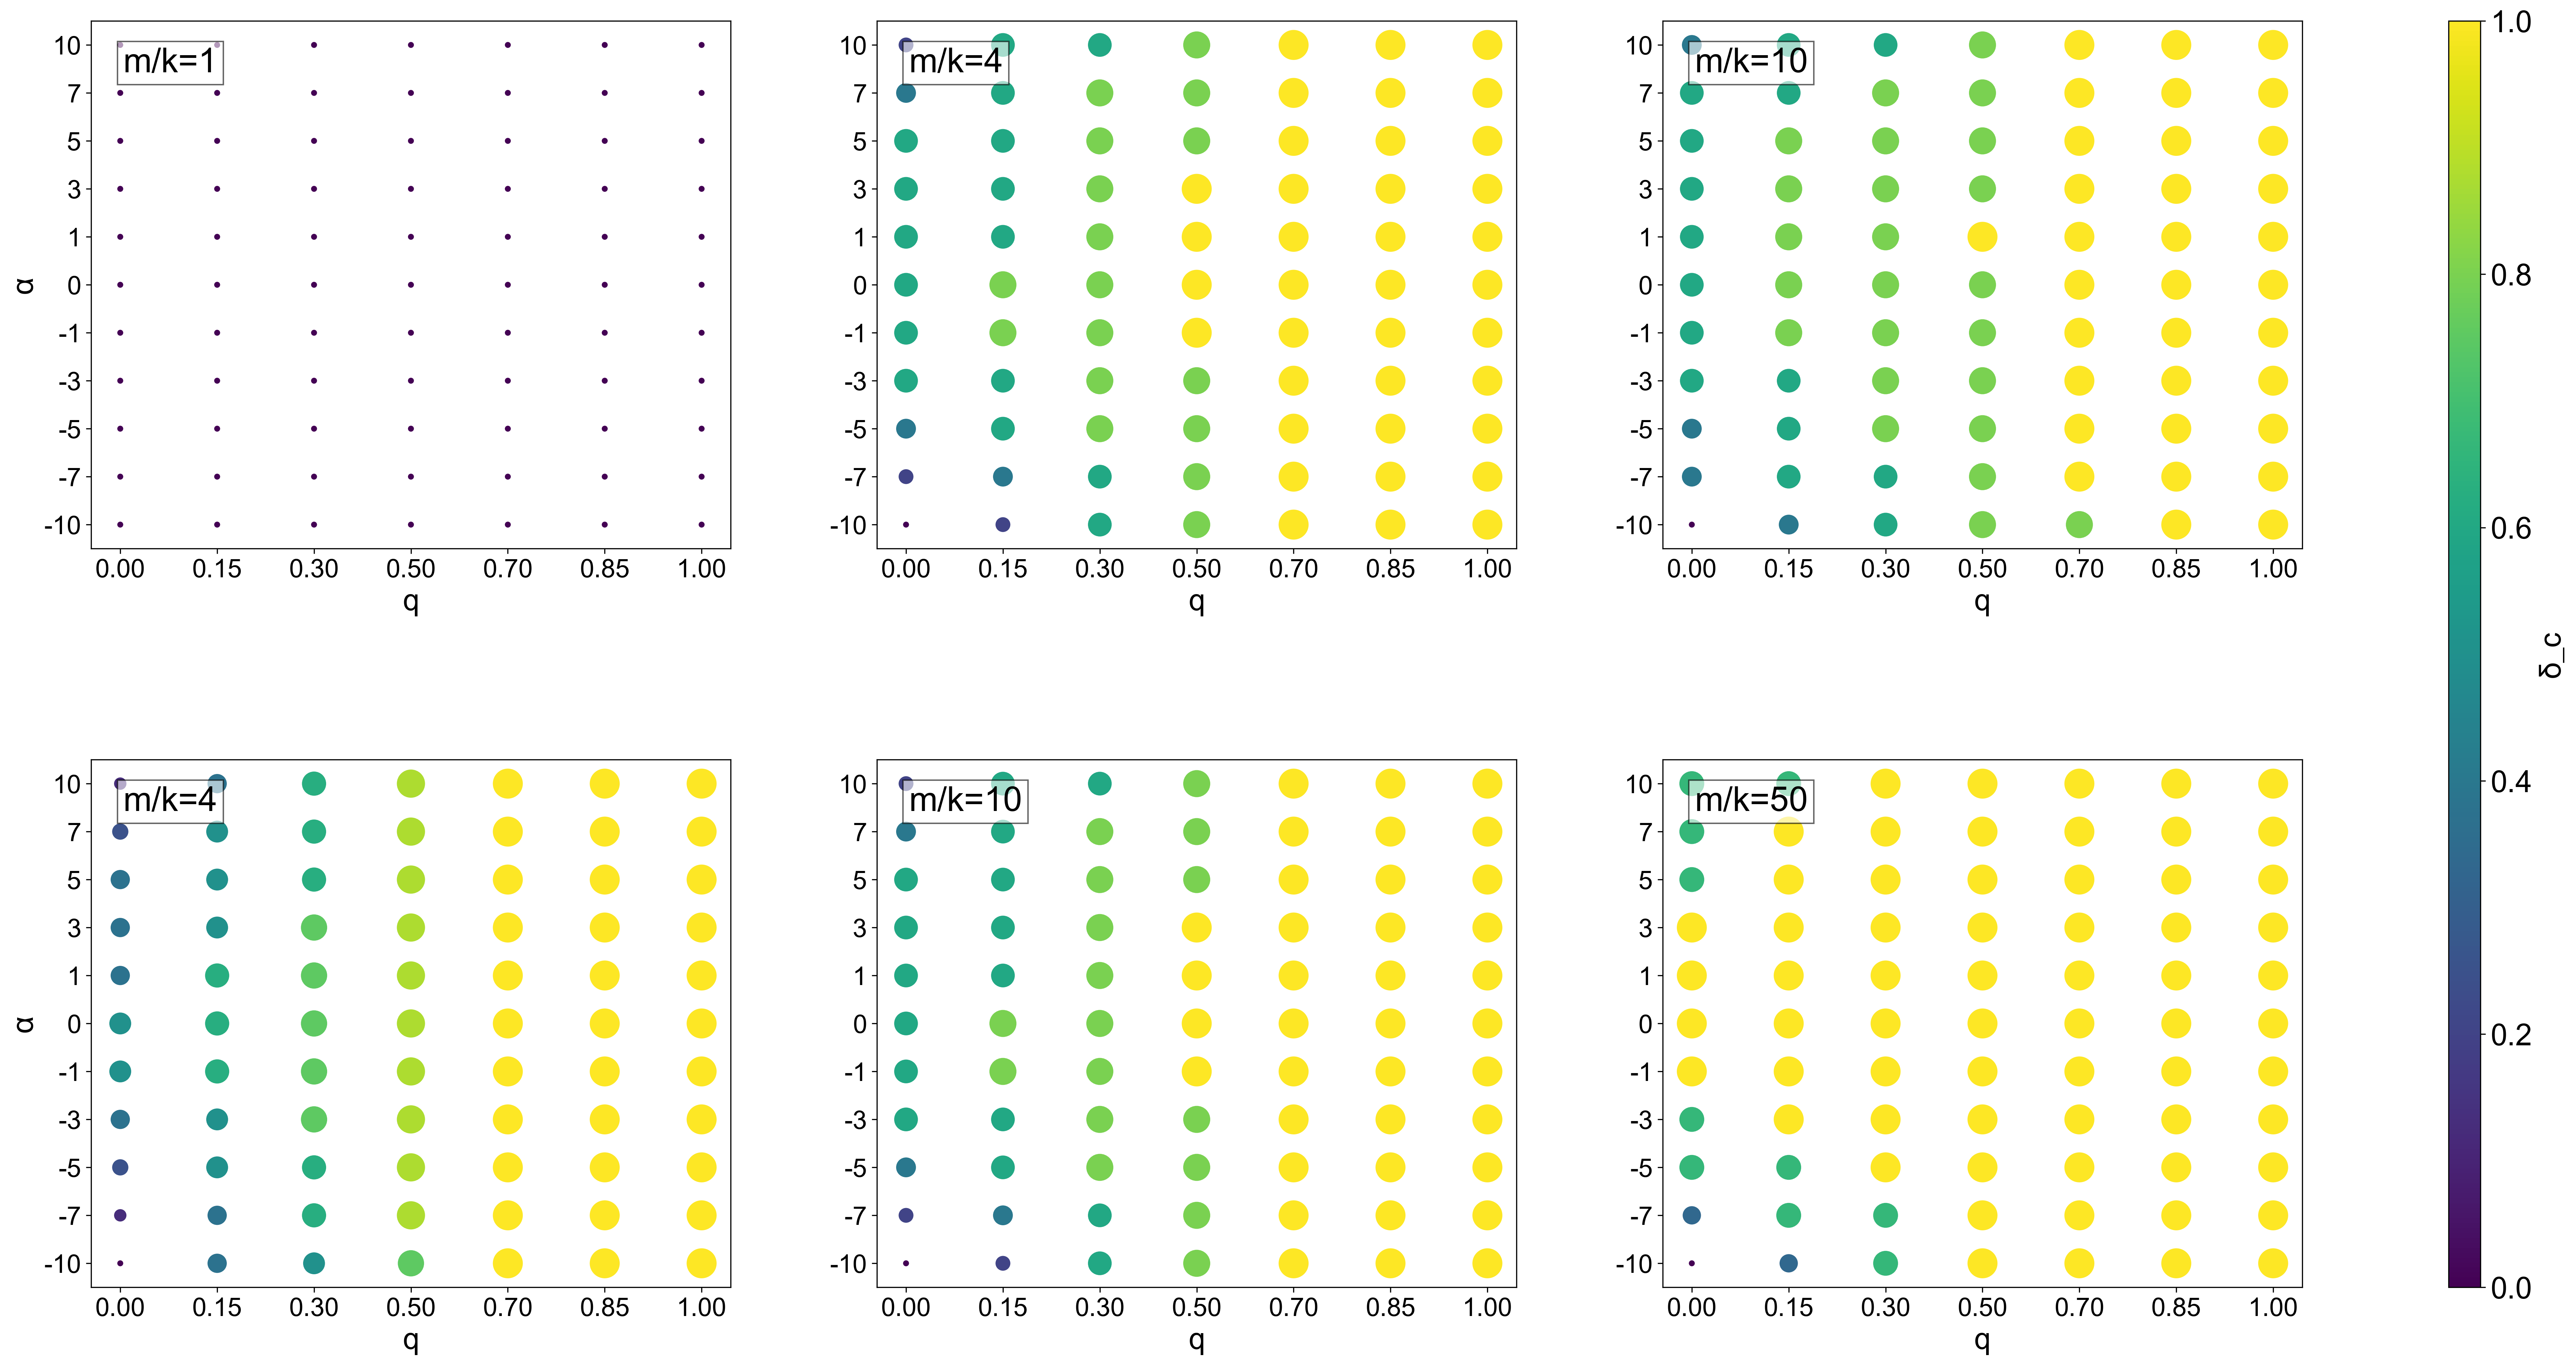

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

# 设置字体，支持中文显示
plt.rcParams['font.family'] = ['Arial Unicode MS', 'Microsoft YaHei', 'SimHei', 'sans-serif']

# 定义函数：处理数据并保存 delta_c 结果到 CSV 文件
def process_data(input_csv, output_csv):
    df = pd.read_csv(input_csv)

    # 计算每个参数组合的均值
    mean_df = df.groupby(['q', 'alpha', 'delta'], as_index=False).mean()

    # 保留两位小数
    mean_df['TLP'] = mean_df['TLP'].round(2)

    # 定义参数范围
    q_values = [0, 0.15, 0.30, 0.5, 0.70, 0.85, 1]
    alpha_values = [-10, -7, -5, -3, -1, 0, 1, 3, 5, 7, 10]

    # 创建保存结果的列表
    results = []

    # 遍历每个q和alpha的组合，筛选满足条件的数据
    for q in q_values:
        for alpha in alpha_values:
            subset = mean_df[(mean_df['q'] == q) & (mean_df['alpha'] == alpha)]
            subset_sorted = subset.sort_values(by='delta')
            valid_row = subset_sorted[subset_sorted['TLP'] >= 0.01]
            
            if not valid_row.empty:
                delta_c = valid_row.iloc[0]['delta']
                TLP_value = valid_row.iloc[0]['TLP']
                results.append([q, alpha, delta_c, TLP_value])

    # 将结果保存为CSV文件
    results_df = pd.DataFrame(results, columns=['q', 'alpha', 'delta_c', 'TLP'])
    results_df.to_csv(output_csv, index=False)
    print(f'Results saved to {output_csv}')

# 定义函数：读取 delta_c 数据并绘制图像
def plot_subplots(data_files, params, param_type, output_image):
    fig = plt.figure(figsize=(30, 16), dpi=300)
    
    # 使用 gridspec 确保所有子图同样大小，并为颜色条留出空间
    gs = gridspec.GridSpec(2, 4, width_ratios=[1, 1, 1, 0.05], height_ratios=[1, 1], wspace=0.3, hspace=0.4)

    # 定义参数范围
    q_values = [0, 0.15, 0.30, 0.5, 0.70, 0.85, 1]
    alpha_values = [-10, -7, -5, -3, -1, 0, 1, 3, 5, 7, 10]

    # 创建虚拟值映射
    q_virtual = np.linspace(0, len(q_values) - 1, len(q_values))
    alpha_virtual = np.linspace(0, len(alpha_values) - 1, len(alpha_values))

    # 创建映射字典
    q_mapping = dict(zip(q_values, q_virtual))
    alpha_mapping = dict(zip(alpha_values, alpha_virtual))

    for idx, (file, param) in enumerate(zip(data_files, params)):
        df = pd.read_csv(file)

        # 将实际值转换为虚拟值
        df['q_virtual'] = df['q'].map(q_mapping)
        df['alpha_virtual'] = df['alpha'].map(alpha_mapping)

        # 设置点的大小和颜色映射
        min_size = 10
        max_size = 400
        norm = plt.Normalize(df['delta_c'].min(), df['delta_c'].max())
        colors = plt.cm.viridis(norm(df['delta_c']))
        sizes = min_size + (max_size - min_size) * norm(df['delta_c'])

        ax = fig.add_subplot(gs[idx // 3, idx % 3])

        scatter = ax.scatter(df['q_virtual'], df['alpha_virtual'], 
                             c=colors, s=sizes, cmap='viridis', norm=norm)

        # 设置标签（代替标题）
        ax.text(0.05, 0.95, f'{param_type}={param}', transform=ax.transAxes, fontsize=24, 
                verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))

        # 设置x轴和y轴标签
        ax.set_xlabel('q', fontsize=21)
        if idx % 3 == 0:
            ax.set_ylabel('α', fontsize=21)
        ax.set_xticks(ticks=q_virtual)
        ax.set_xticklabels([f'{x:.2f}' for x in q_values], fontsize=18)
        ax.set_yticks(ticks=alpha_virtual)
        ax.set_yticklabels([f'{y:.0f}' for y in alpha_values], fontsize=18)

    # 设置统一的颜色条
    cbar_ax = fig.add_subplot(gs[:, -1])  # 最右边添加颜色条
    cbar = fig.colorbar(scatter, cax=cbar_ax)
    cbar.set_label('δ_c', fontsize=21)
    cbar.ax.tick_params(labelsize=21)

    # 保存图像
    plt.savefig(output_image, format='pdf', bbox_inches='tight')
    print(f'Plot saved as {output_image}')
    plt.show()

# 调用函数生成图像

# m 参数影响的大图（包含 m=1, m=4, m=10）
file_m1 = r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result(m=1).csv'
file_m4 = r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result.csv'  # 基线 m=4
file_m10 = r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result(m=10).csv'

# k 参数影响的大图（包含 k=4, k=10, k=50）
file_k4 = r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result(k=4).csv'
file_k10 = r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result.csv'  # 基线 k=10
file_k50 = r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result(k=50).csv'

# 生成 delta_c 数据
for file, m in zip([file_m1, file_m4, file_m10], [1, 4, 10]):
    output_csv = f'Fig06_result_delta_c_m{m}.csv'
    process_data(file, output_csv)

for file, k in zip([file_k4, file_k10, file_k50], [4, 10, 50]):
    output_csv = f'Fig06_result_delta_c_k{k}.csv'
    process_data(file, output_csv)

# 绘制 m 和 k 参数影响的子图
plot_subplots(
    data_files=[f'Fig06_result_delta_c_m1.csv', f'Fig06_result_delta_c_m4.csv', f'Fig06_result_delta_c_m10.csv',
                f'Fig06_result_delta_c_k4.csv', f'Fig06_result_delta_c_k10.csv', f'Fig06_result_delta_c_k50.csv'],
    params=[1, 4, 10, 4, 10, 50],
    param_type='m/k',
    output_image='Fig06_combined_result_plot.pdf'
)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15032\2475502358.py:77: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  scatter = ax.scatter(df['q_virtual'], df['alpha_virtual'],
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15032\2475502358.py:77: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  scatter = ax.scatter(df['q_virtual'], df['alpha_virtual'],
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15032\2475502358.py:77: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  scatter = ax.scatter(df['q_virtual'], df['alpha_virtual'],
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15032\2475502358.py:77: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  scatter = ax.scatter(df['q_virtual'], df['alpha_virtual'],
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15032\24

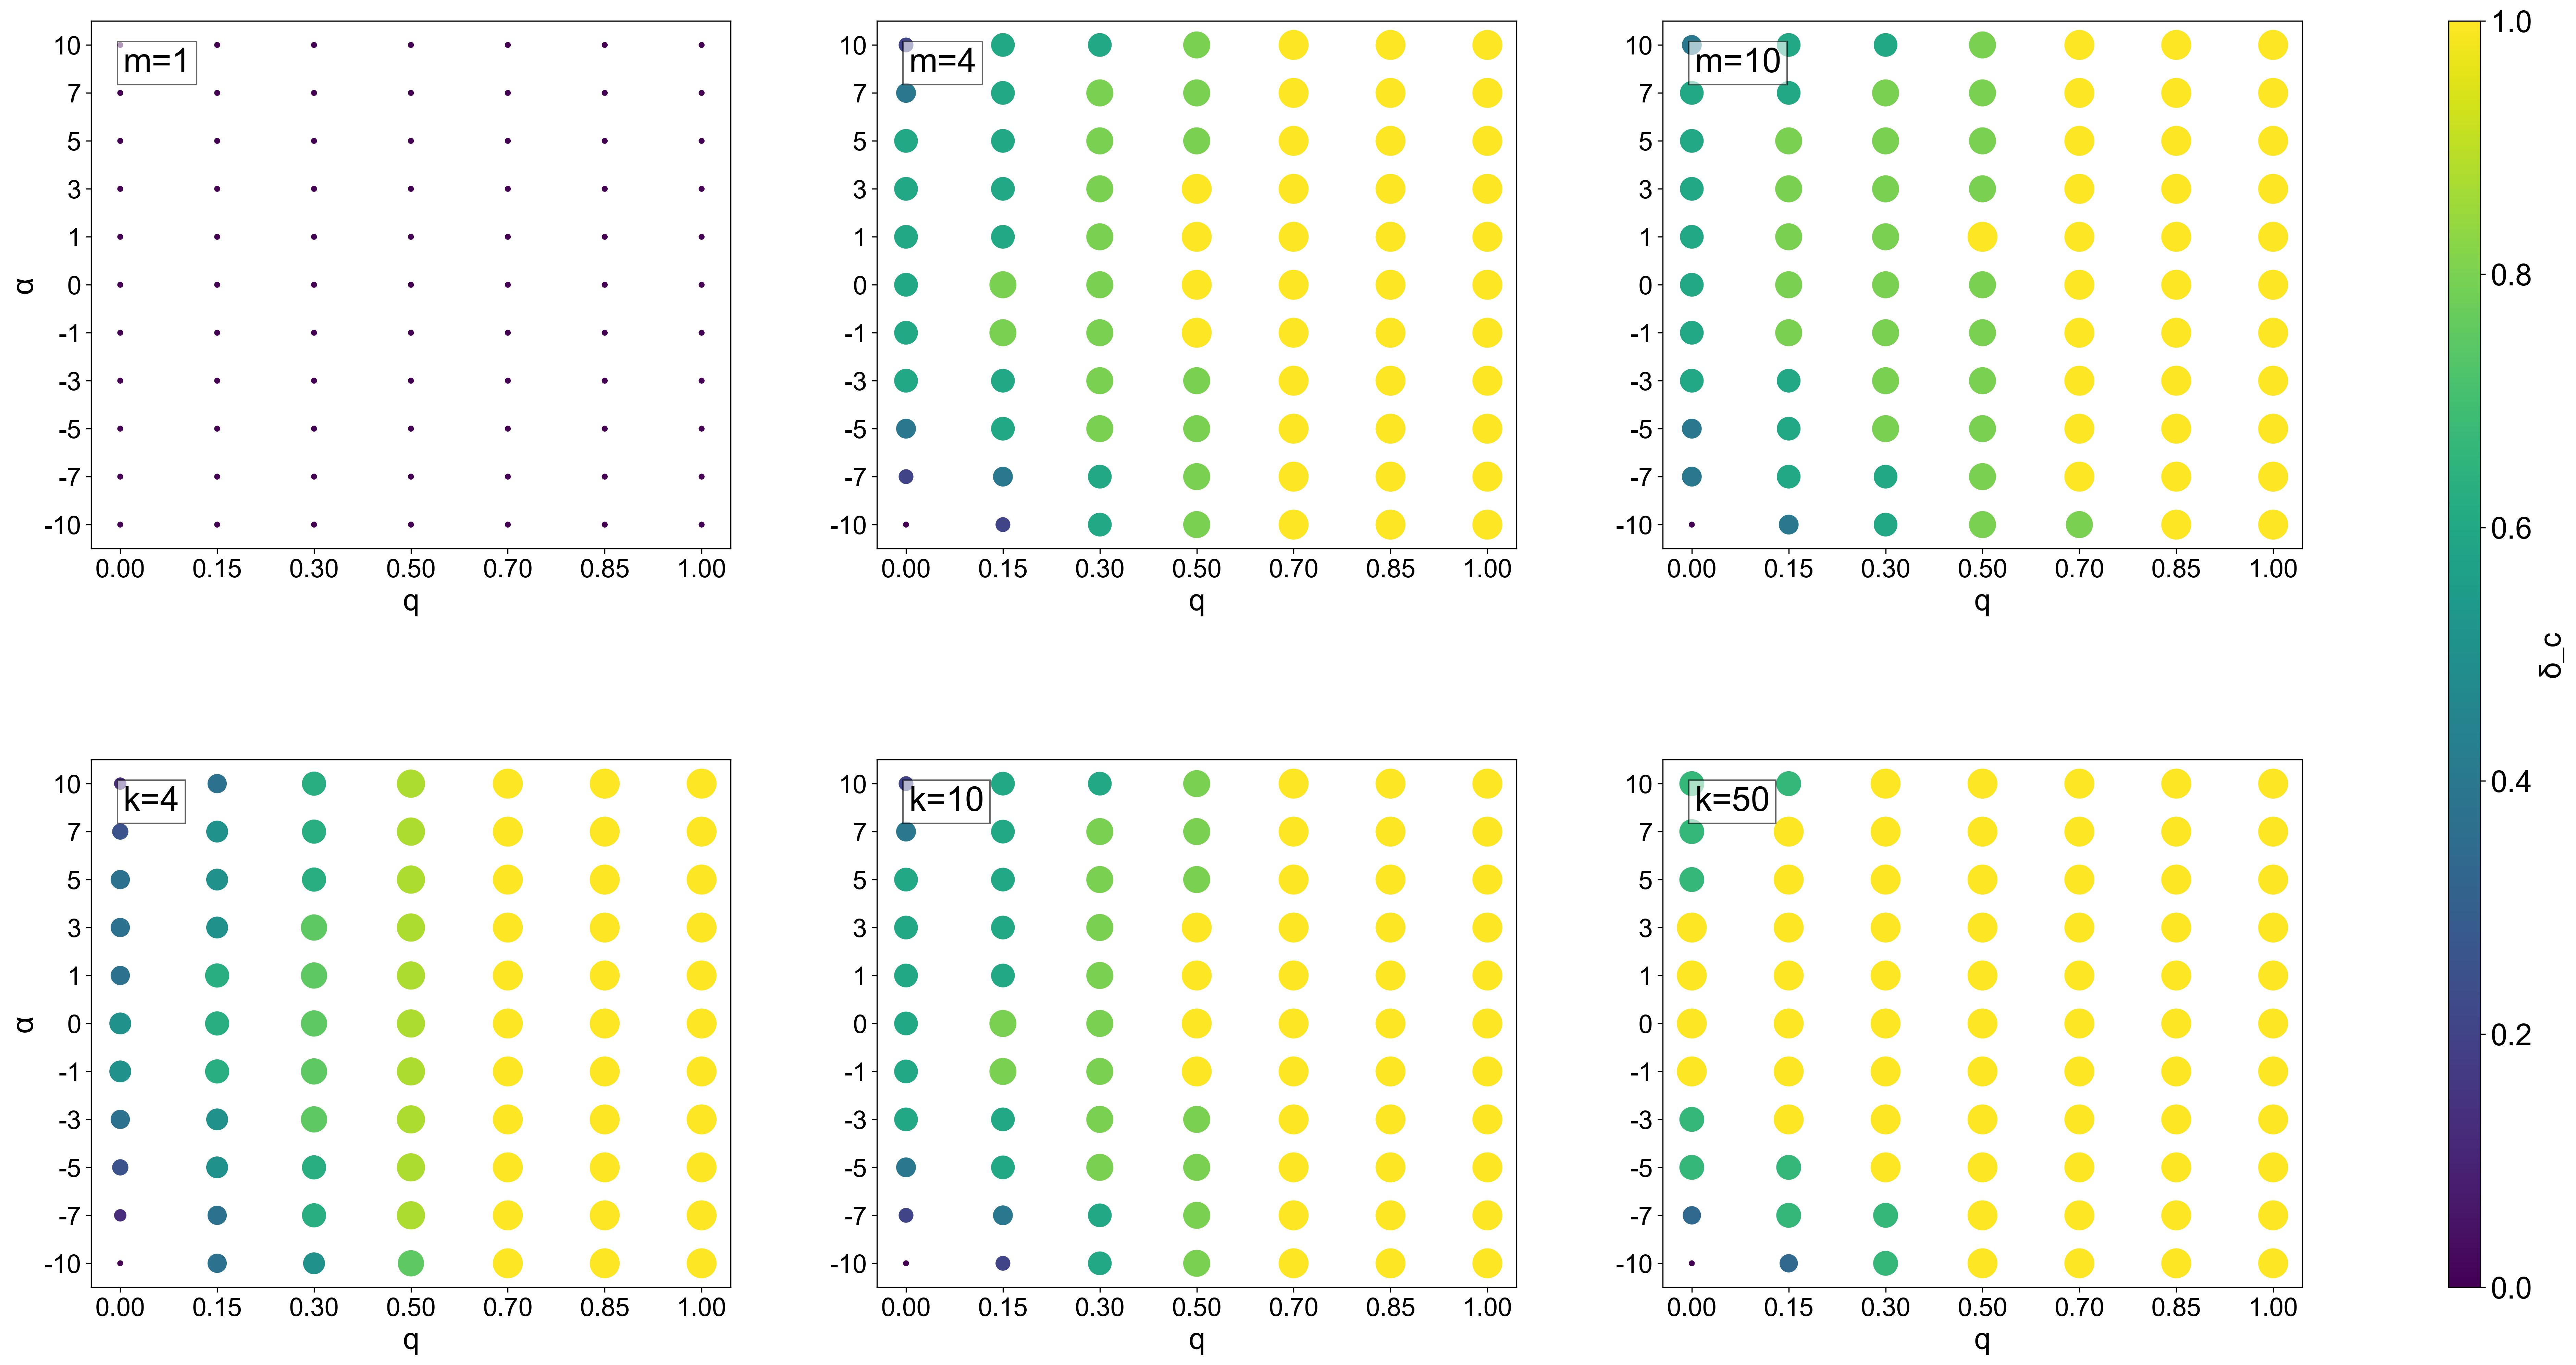

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

# 设置字体，支持中文显示
plt.rcParams['font.family'] = ['Arial Unicode MS', 'Microsoft YaHei', 'SimHei', 'sans-serif']

# 定义函数：处理数据并保存 delta_c 结果到 CSV 文件
def process_data(input_csv, output_csv):
    df = pd.read_csv(input_csv)

    # 计算每个参数组合的均值
    mean_df = df.groupby(['q', 'alpha', 'delta'], as_index=False).mean()

    # 保留两位小数
    mean_df['TLP'] = mean_df['TLP'].round(2)

    # 定义参数范围
    q_values = [0, 0.15, 0.30, 0.5, 0.70, 0.85, 1]
    alpha_values = [-10, -7, -5, -3, -1, 0, 1, 3, 5, 7, 10]

    # 创建保存结果的列表
    results = []

    # 遍历每个q和alpha的组合，筛选满足条件的数据
    for q in q_values:
        for alpha in alpha_values:
            subset = mean_df[(mean_df['q'] == q) & (mean_df['alpha'] == alpha)]
            subset_sorted = subset.sort_values(by='delta')
            valid_row = subset_sorted[subset_sorted['TLP'] >= 0.01]
            
            if not valid_row.empty:
                delta_c = valid_row.iloc[0]['delta']
                TLP_value = valid_row.iloc[0]['TLP']
                results.append([q, alpha, delta_c, TLP_value])

    # 将结果保存为CSV文件
    results_df = pd.DataFrame(results, columns=['q', 'alpha', 'delta_c', 'TLP'])
    results_df.to_csv(output_csv, index=False)

# 定义函数：读取 delta_c 数据并绘制图像
def plot_subplots(data_files, params_m, params_k, output_image):
    fig = plt.figure(figsize=(30, 16), dpi=300)
    
    # 使用 gridspec 确保所有子图同样大小，并为颜色条留出空间
    gs = gridspec.GridSpec(2, 4, width_ratios=[1, 1, 1, 0.05], height_ratios=[1, 1], wspace=0.3, hspace=0.4)

    # 定义参数范围
    q_values = [0, 0.15, 0.30, 0.5, 0.70, 0.85, 1]
    alpha_values = [-10, -7, -5, -3, -1, 0, 1, 3, 5, 7, 10]

    # 创建虚拟值映射
    q_virtual = np.linspace(0, len(q_values) - 1, len(q_values))
    alpha_virtual = np.linspace(0, len(alpha_values) - 1, len(alpha_values))

    # 创建映射字典
    q_mapping = dict(zip(q_values, q_virtual))
    alpha_mapping = dict(zip(alpha_values, alpha_virtual))

    for idx, file in enumerate(data_files):
        df = pd.read_csv(file)

        # 将实际值转换为虚拟值
        df['q_virtual'] = df['q'].map(q_mapping)
        df['alpha_virtual'] = df['alpha'].map(alpha_mapping)

        # 设置点的大小和颜色映射
        min_size = 10
        max_size = 400
        norm = plt.Normalize(df['delta_c'].min(), df['delta_c'].max())
        colors = plt.cm.viridis(norm(df['delta_c']))
        sizes = min_size + (max_size - min_size) * norm(df['delta_c'])

        ax = fig.add_subplot(gs[idx // 3, idx % 3])

        scatter = ax.scatter(df['q_virtual'], df['alpha_virtual'], 
                             c=colors, s=sizes, cmap='viridis', norm=norm)

        # 判断显示 m 还是 k 参数
        if idx < 3:
            param_label = f'm={params_m[idx]}'
        else:
            param_label = f'k={params_k[idx-3]}'

        # 设置标签（代替标题）
        ax.text(0.05, 0.95, param_label, transform=ax.transAxes, fontsize=24, 
                verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))

        # 设置x轴和y轴标签
        ax.set_xlabel('q', fontsize=21)
        if idx % 3 == 0:
            ax.set_ylabel('α', fontsize=21)
        ax.set_xticks(ticks=q_virtual)
        ax.set_xticklabels([f'{x:.2f}' for x in q_values], fontsize=18)
        ax.set_yticks(ticks=alpha_virtual)
        ax.set_yticklabels([f'{y:.0f}' for y in alpha_values], fontsize=18)

    # 设置统一的颜色条
    cbar_ax = fig.add_subplot(gs[:, -1])  # 最右边添加颜色条
    cbar = fig.colorbar(scatter, cax=cbar_ax)
    cbar.set_label('δ_c', fontsize=21)
    cbar.ax.tick_params(labelsize=21)

    # 保存图像
    plt.savefig(output_image, format='pdf', bbox_inches='tight')
    plt.show()

# 调用函数生成图像

# m 参数影响的大图（包含 m=1, m=4, m=10）
file_m1 = r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result(m=1).csv'
file_m4 = r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result.csv'  # 基线 m=4
file_m10 = r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result(m=10).csv'

# k 参数影响的大图（包含 k=4, k=10, k=50）
file_k4 = r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result(k=4).csv'
file_k10 = r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result.csv'  # 基线 k=10
file_k50 = r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result(k=50).csv'

# 生成 delta_c 数据
for file, m in zip([file_m1, file_m4, file_m10], [1, 4, 10]):
    output_csv = f'Fig06_result_delta_c_m{m}.csv'
    process_data(file, output_csv)

for file, k in zip([file_k4, file_k10, file_k50], [4, 10, 50]):
    output_csv = f'Fig06_result_delta_c_k{k}.csv'
    process_data(file, output_csv)

# 绘制 m 和 k 参数影响的子图
plot_subplots(
    data_files=[f'Fig06_result_delta_c_m1.csv', f'Fig06_result_delta_c_m4.csv', f'Fig06_result_delta_c_m10.csv',
                f'Fig06_result_delta_c_k4.csv', f'Fig06_result_delta_c_k10.csv', f'Fig06_result_delta_c_k50.csv'],
    params_m=[1, 4, 10],
    params_k=[4, 10, 50],
    output_image='Fig06_combined_result_plot.pdf'
)


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

# 设置字体，支持中文显示
plt.rcParams['font.family'] = ['Arial Unicode MS', 'Microsoft YaHei', 'SimHei', 'sans-serif']

# 定义函数：处理数据并保存 delta_c 结果到 CSV 文件
def process_data(input_csv, output_csv):
    df = pd.read_csv(input_csv)

    # 计算每个参数组合的均值
    mean_df = df.groupby(['q', 'alpha', 'delta'], as_index=False).mean()

    # 保留两位小数
    mean_df['TLP'] = mean_df['TLP'].round(2)

    # 定义参数范围
    q_values = [0, 0.15, 0.30, 0.5, 0.70, 0.85, 1]
    alpha_values = [-10, -7, -5, -3, -1, 0, 1, 3, 5, 7, 10]

    # 创建保存结果的列表
    results = []

    # 遍历每个q和alpha的组合，筛选满足条件的数据
    for q in q_values:
        for alpha in alpha_values:
            subset = mean_df[(mean_df['q'] == q) & (mean_df['alpha'] == alpha)]
            subset_sorted = subset.sort_values(by='delta')
            valid_row = subset_sorted[subset_sorted['TLP'] >= 0.01]
            
            if not valid_row.empty:
                delta_c = valid_row.iloc[0]['delta']
                TLP_value = valid_row.iloc[0]['TLP']
                results.append([q, alpha, delta_c, TLP_value])

    # 将结果保存为CSV文件
    results_df = pd.DataFrame(results, columns=['q', 'alpha', 'delta_c', 'TLP'])
    results_df.to_csv(output_csv, index=False)

# 定义函数：读取 delta_c 数据并绘制图像
def plot_subplots(data_files, params_m, params_k, output_image):
    fig = plt.figure(figsize=(30, 16), dpi=300)
    
    # 使用 gridspec 确保所有子图同样大小，并为颜色条留出空间
    gs = gridspec.GridSpec(2, 4, width_ratios=[1, 1, 1, 0.05], height_ratios=[1, 1], wspace=0.3, hspace=0.4)

    # 定义参数范围
    q_values = [0, 0.15, 0.30, 0.5, 0.70, 0.85, 1]
    alpha_values = [-10, -7, -5, -3, -1, 0, 1, 3, 5, 7, 10]

    # 创建虚拟值映射
    q_virtual = np.linspace(0, len(q_values) - 1, len(q_values))
    alpha_virtual = np.linspace(0, len(alpha_values) - 1, len(alpha_values))

    # 创建映射字典
    q_mapping = dict(zip(q_values, q_virtual))
    alpha_mapping = dict(zip(alpha_values, alpha_virtual))

    for idx, file in enumerate(data_files):
        df = pd.read_csv(file)

        # 将实际值转换为虚拟值
        df['q_virtual'] = df['q'].map(q_mapping)
        df['alpha_virtual'] = df['alpha'].map(alpha_mapping)

        # 设置点的大小和颜色映射
        min_size = 10
        max_size = 400
        norm = plt.Normalize(df['delta_c'].min(), df['delta_c'].max())
        colors = plt.cm.viridis(norm(df['delta_c']))
        sizes = min_size + (max_size - min_size) * norm(df['delta_c'])

        ax = fig.add_subplot(gs[idx // 3, idx % 3])

        scatter = ax.scatter(df['q_virtual'], df['alpha_virtual'], 
                             c=colors, s=sizes, cmap='viridis', norm=norm)

        # 判断显示 m 还是 k 参数，并设置为标题
        if idx < 3:
            ax.set_title(f'm={params_m[idx]}', fontsize=24)  # m 参数的标题
        else:
            ax.set_title(f'k={params_k[idx-3]}', fontsize=24)  # k 参数的标题

        # 设置x轴和y轴标签
        ax.set_xlabel('q', fontsize=21)
        if idx % 3 == 0:
            ax.set_ylabel('α', fontsize=21)
        ax.set_xticks(ticks=q_virtual)
        ax.set_xticklabels([f'{x:.2f}' for x in q_values], fontsize=18)
        ax.set_yticks(ticks=alpha_virtual)
        ax.set_yticklabels([f'{y:.0f}' for y in alpha_values], fontsize=18)

    # 设置统一的颜色条
    cbar_ax = fig.add_subplot(gs[:, -1])  # 最右边添加颜色条
    cbar = fig.colorbar(scatter, cax=cbar_ax)
    cbar.set_label('δ_c', fontsize=21)
    cbar.ax.tick_params(labelsize=21)

    # 保存图像
    plt.savefig(output_image, format='pdf', bbox_inches='tight')
    plt.show()

# 调用函数生成图像

# m 参数影响的大图（包含 m=1, m=4, m=10）
file_m1 = r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result(m=1).csv'
file_m4 = r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result.csv'  # 基线 m=4
file_m10 = r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result(m=10).csv'

# k 参数影响的大图（包含 k=4, k=10, k=50）
file_k4 = r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result(k=4).csv'
file_k10 = r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result.csv'  # 基线 k=10
file_k50 = r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result(k=50).csv'

# 生成 delta_c 数据
for file, m in zip([file_m1, file_m4, file_m10], [1, 4, 10]):
    output_csv = f'Fig06_result_delta_c_m{m}.csv'
    process_data(file, output_csv)

for file, k in zip([file_k4, file_k10, file_k50], [4, 10, 50]):
    output_csv = f'Fig06_result_delta_c_k{k}.csv'
    process_data(file, output_csv)

# 绘制 m 和 k 参数影响的子图
plot_subplots(
    data_files=[f'Fig06_result_delta_c_m1.csv', f'Fig06_result_delta_c_m4.csv', f'Fig06_result_delta_c_m10.csv',
                f'Fig06_result_delta_c_k4.csv', f'Fig06_result_delta_c_k10.csv', f'Fig06_result_delta_c_k50.csv'],
    params_m=[1, 4, 10],
    params_k=[4, 10, 50],
    output_image='Fig06_combined_result_plot.pdf'
)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15032\446833765.py:77: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  scatter = ax.scatter(df['q_virtual'], df['alpha_virtual'],
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15032\446833765.py:77: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  scatter = ax.scatter(df['q_virtual'], df['alpha_virtual'],
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15032\446833765.py:77: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  scatter = ax.scatter(df['q_virtual'], df['alpha_virtual'],
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15032\446833765.py:77: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  scatter = ax.scatter(df['q_virtual'], df['alpha_virtual'],
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15032\446833

图解：Fig.4. q和α不同参数组合下的阈值Np_c
阈值Np_c指当每日新增患者数超过该Np值时，损失患者数从0迅速增大，相应地总平均转诊数也会迅速增加。阈值Np_c越大，图例形状越大，颜色偏黄：阈值Np_c越小，图例形状越小，颜色偏深蓝。
从图上看，要使阈值点Np_c最大，即q=0.50，α=-3，-1，0，1，或 q>0.5即可；

分析：
参数q：指随机转诊概率，即不遵循患者共享网络结构进行转诊的比例，
参数α：指权重偏好，即倾向于出边节点权重大/小进行转诊，但基础是遵循患者共享网络结构进行转诊，（1-q）
因此要使得阈值点Np_c最大，即医院的患者共享网络的基础承载力更强，结果显示q>0.5即可，则大部分患者随机转诊，不遵循患者共享网络结构。“随机”
而如果q=0.5时，患者群体不遵循患者共享网络结构进行转诊的比例为0.5，此时α=-3，-1，0，1，即这种倾向于出边节点权重大/小转诊的趋势不明显时，阈值点Np_c也可以达到最大；需要进一步分析参数α的影响；

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16112\890726065.py:46: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  p_c_grid[i, j] = value if not value.empty else np.nan  # 若无数据则填充NaN


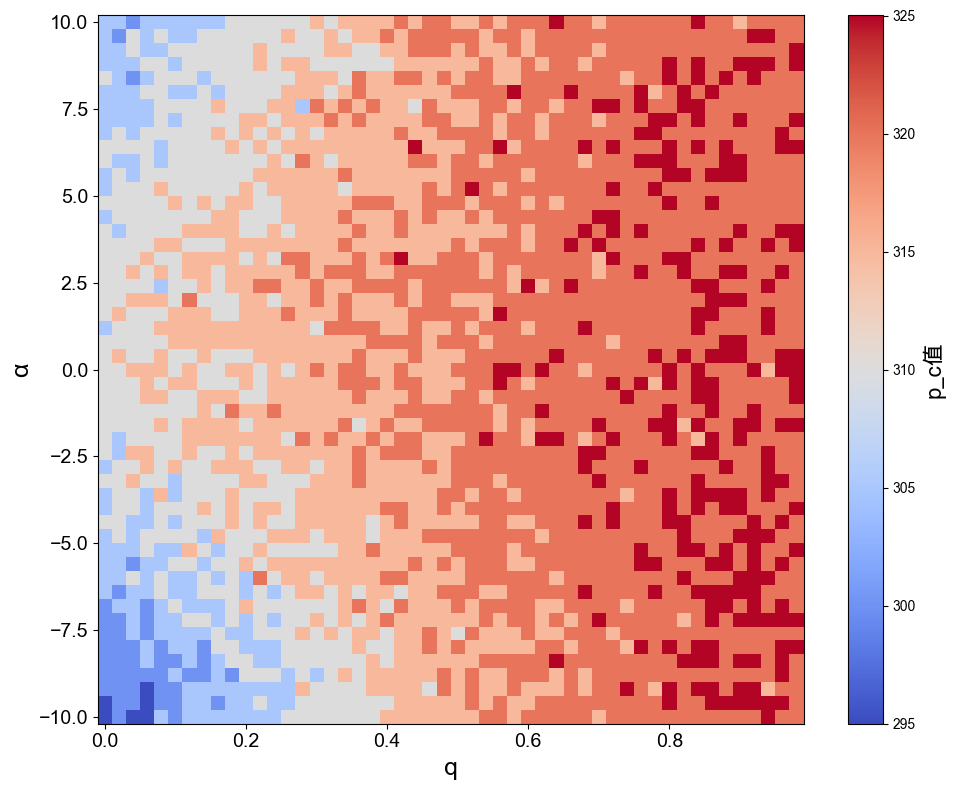

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# 设置合适的字体以支持中文显示
plt.rcParams['font.family'] = ['Arial Unicode MS', 'Microsoft YaHei', 'SimHei', 'sans-serif']

# 读取CSV文件
df = pd.read_csv(r'D:\网页浏览器下载\Fig04(22)_result.csv')

# 先按 'p', 'q', 'alpha' 进行分组，并对 'TLP' 求平均
df_grouped = df.groupby(['p', 'q', 'alpha']).mean().reset_index()

# 提取所需的列
df_filtered = df_grouped[['TLP', 'p', 'q', 'alpha']]

# 初始化一个字典用于存储 p_c 值
p_c_dict = {'q': [], 'alpha': [], 'p_c': []}

# 遍历每一个 q 和 alpha 组合
for q_value in df_filtered['q'].unique():
    for alpha_value in df_filtered['alpha'].unique():
        # 过滤出对应 q 和 alpha 的所有行，并按 p 升序排列
        subset = df_filtered[(df_filtered['q'] == q_value) & (df_filtered['alpha'] == alpha_value)].sort_values('p')
        
        # 查找第一个 TLP >= 0.01 的 p 值
        for index, row in subset.iterrows():
            if row['TLP'] >= 0.01:
                p_c_dict['q'].append(q_value)
                p_c_dict['alpha'].append(alpha_value)
                p_c_dict['p_c'].append(row['p'])
                break  # 找到第一个符合条件的 p 后停止判断

# 将字典转换为 DataFrame
df_p_c = pd.DataFrame(p_c_dict)

# 创建 q 和 alpha 的网格
q_unique = np.sort(df_p_c['q'].unique())
alpha_unique = np.sort(df_p_c['alpha'].unique())

# 构建 p_c 值的二维网格，用于生成热力图
p_c_grid = np.zeros((len(alpha_unique), len(q_unique)))

for i, alpha in enumerate(alpha_unique):
    for j, q in enumerate(q_unique):
        value = df_p_c[(df_p_c['q'] == q) & (df_p_c['alpha'] == alpha)]['p_c']
        p_c_grid[i, j] = value if not value.empty else np.nan  # 若无数据则填充NaN

# 绘制热力图
plt.figure(figsize=(10, 8))
heatmap = plt.pcolormesh(q_unique, alpha_unique, p_c_grid, cmap='coolwarm', shading='auto')

# 添加颜色条
cbar = plt.colorbar(heatmap)
cbar.set_label('p_c值', fontsize=16)

# 设置坐标轴标签
plt.xlabel('q', fontsize=18)
plt.ylabel('α', fontsize=18)

# 设置坐标轴刻度
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# 显示图形
plt.tight_layout()
plt.show()


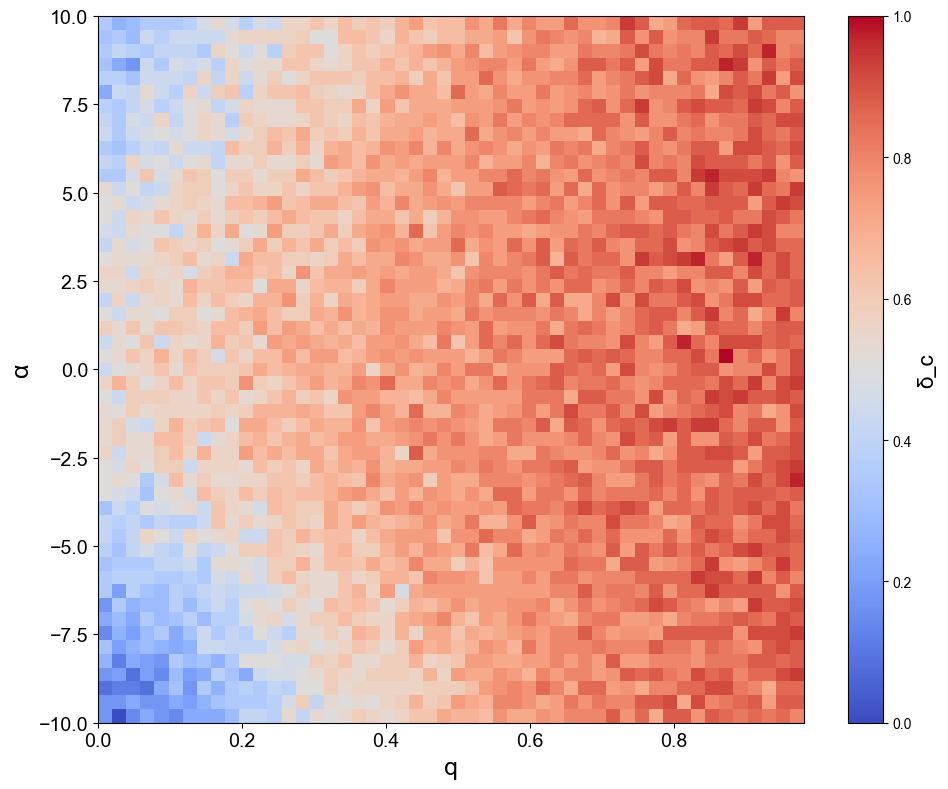

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

# 设置合适的字体以支持中文显示
plt.rcParams['font.family'] = ['Arial Unicode MS', 'Microsoft YaHei', 'SimHei', 'sans-serif']

# 读取CSV文件
df = pd.read_csv(r'D:\网页浏览器下载\Fig04(222)_result.csv')

# 先按 'p', 'q', 'alpha' 进行分组，并对 'TLP' 求平均
df_grouped = df.groupby(['p', 'q', 'alpha']).mean().reset_index()

# 提取所需的列
df_filtered = df_grouped[['TLP', 'p', 'q', 'alpha']]

# 初始化一个字典用于存储 p_c 值
p_c_dict = {'q': [], 'alpha': [], 'p_c': []}

# 遍历每一个 q 和 alpha 组合
for q_value in df_filtered['q'].unique():
    for alpha_value in df_filtered['alpha'].unique():
        # 过滤出对应 q 和 alpha 的所有行，并按 p 升序排列
        subset = df_filtered[(df_filtered['q'] == q_value) & (df_filtered['alpha'] == alpha_value)].sort_values('p')
        
        # 查找第一个 TLP >= 0.01 的 p 值
        for index, row in subset.iterrows():
            if row['TLP'] >= 0.01:
                p_c_dict['q'].append(q_value)
                p_c_dict['alpha'].append(alpha_value)
                p_c_dict['p_c'].append(row['p'])
                break  # 找到第一个符合条件的 p 后停止判断

# 将字典转换为 DataFrame
df_p_c = pd.DataFrame(p_c_dict)

# 创建 q 和 alpha 的网格
q_unique = np.sort(df_p_c['q'].unique())
alpha_unique = np.sort(df_p_c['alpha'].unique())

# 构建 p_c 值的二维网格，用于生成热力图
p_c_grid = np.full((len(alpha_unique), len(q_unique)), np.nan)

for i, alpha in enumerate(alpha_unique):
    for j, q in enumerate(q_unique):
        value = df_p_c[(df_p_c['q'] == q) & (df_p_c['alpha'] == alpha)]['p_c']
        if not value.empty:
            p_c_grid[i, j] = value.values[0]


# 创建插值网格
q_grid, alpha_grid = np.meshgrid(q_unique, alpha_unique)

# 插值处理，填补缺失值并使数据更加平滑
p_c_smooth = griddata((df_p_c['q'], df_p_c['alpha']), df_p_c['p_c'], (q_grid, alpha_grid), method='cubic')

# 插值完成后，再进行归一化处理
min_value = np.nanmin(p_c_smooth)
max_value = np.nanmax(p_c_smooth)

# 归一化处理，公式为 δ_c% = (δ_c-min) / (max - min)
p_c_normalized = (p_c_smooth - min_value) / (max_value - min_value)

# 绘制热力图
plt.figure(figsize=(10, 8))
heatmap = plt.imshow(p_c_normalized, extent=[q_unique.min(), q_unique.max(), alpha_unique.min(), alpha_unique.max()], 
                     origin='lower', cmap='coolwarm', aspect='auto')

# 添加颜色条
cbar = plt.colorbar(heatmap)
cbar.set_label('δ_c', fontsize=16)

# 设置坐标轴标签
plt.xlabel('q', fontsize=18)
plt.ylabel('α', fontsize=18)

# 设置坐标轴刻度
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# 显示图形
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 设置合适的字体以支持中文显示
plt.rcParams['font.family'] = ['Arial Unicode MS', 'Microsoft YaHei', 'SimHei', 'sans-serif']

# 读取CSV文件
df = pd.read_csv(r'D:\网页浏览器下载\Fig04(222)_result.csv')

# 先按 'p', 'q', 'alpha' 进行分组，并对 'TLP' 求平均
df_grouped = df.groupby(['p', 'q', 'alpha']).mean().reset_index()

# 提取所需的列
df_filtered = df_grouped[['TLP', 'p', 'q', 'alpha']]

# 初始化一个字典用于存储 p_c 值
p_c_dict = {'q': [], 'alpha': [], 'p_c': []}

# 遍历每一个 q 和 alpha 组合
for q_value in df_filtered['q'].unique():
    for alpha_value in df_filtered['alpha'].unique():
        # 过滤出对应 q 和 alpha 的所有行，并按 p 升序排列
        subset = df_filtered[(df_filtered['q'] == q_value) & (df_filtered['alpha'] == alpha_value)].sort_values('p')
        
        # 查找第一个 TLP >= 0.01 的 p 值
        for index, row in subset.iterrows():
            if row['TLP'] >= 0.01:
                p_c_dict['q'].append(q_value)
                p_c_dict['alpha'].append(alpha_value)
                p_c_dict['p_c'].append(row['p'])
                break  # 找到第一个符合条件的 p 后停止判断

# 将字典转换为 DataFrame
df_p_c = pd.DataFrame(p_c_dict)

# 将 DataFrame 保存为 CSV 文件
#df_p_c.to_csv(r'p_c_values.csv', index=False)

# 创建 q 和 alpha 的网格
q_unique = np.sort(df_p_c['q'].unique())
alpha_unique = np.sort(df_p_c['alpha'].unique())

# 构建 p_c 值的二维网格，用于生成热力图
p_c_grid = np.full((len(alpha_unique), len(q_unique)), np.nan)

for i, alpha in enumerate(alpha_unique):
    for j, q in enumerate(q_unique):
        value = df_p_c[(df_p_c['q'] == q) & (df_p_c['alpha'] == alpha)]['p_c']
        if not value.empty:
            p_c_grid[i, j] = value.values[0]

# 计算 δ_c 的最小值 min 和最大值 max
min_value = np.nanmin(p_c_grid)
max_value = np.nanmax(p_c_grid)

# 归一化处理，公式为 δ_c% = (δ_c-min) / (max - min)
p_c_normalized = (p_c_grid - min_value) / (max_value - min_value)

# 绘制不插值的热力图
plt.figure(figsize=(10, 8))
heatmap = plt.imshow(p_c_normalized, extent=[q_unique.min(), q_unique.max(), alpha_unique.min(), alpha_unique.max()], 
                     origin='lower', cmap='coolwarm', aspect='auto')

# 添加颜色条
cbar = plt.colorbar(heatmap)
cbar.set_label(' δ_c', fontsize=16)

# 设置坐标轴标签
plt.xlabel('q', fontsize=18)
plt.ylabel('α', fontsize=18)

# 设置坐标轴刻度
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# 显示图形
plt.tight_layout()
plt.show()
# 不插值处理

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 处理CSV并返回归一化的p_c网格
def process_csv(file_path):
    df = pd.read_csv(file_path)
    
    # 按 'p', 'q', 'alpha' 分组，并对 'TLP' 求平均
    df_grouped = df.groupby(['p', 'q', 'alpha']).mean().reset_index()
    
    # 过滤所需的列
    df_filtered = df_grouped[['TLP', 'p', 'q', 'alpha']]
    
    # 初始化字典存储 p_c 值
    p_c_dict = {'q': [], 'alpha': [], 'p_c': []}
    
    # 遍历每一个 q 和 alpha 组合
    for q_value in df_filtered['q'].unique():
        for alpha_value in df_filtered['alpha'].unique():
            # 过滤出对应 q 和 alpha 的所有行
            subset = df_filtered[(df_filtered['q'] == q_value) & (df_filtered['alpha'] == alpha_value)].sort_values('p')
            
            # 查找第一个 TLP >= 0.01 的 p 值
            for _, row in subset.iterrows():
                if row['TLP'] >= 0.01:
                    p_c_dict['q'].append(q_value)
                    p_c_dict['alpha'].append(alpha_value)
                    p_c_dict['p_c'].append(row['p'])
                    break  # 找到第一个符合条件的 p 后停止

    # 转换为 DataFrame
    df_p_c = pd.DataFrame(p_c_dict)
    
    # 创建 q 和 alpha 的网格
    q_unique = np.sort(df_p_c['q'].unique())
    alpha_unique = np.sort(df_p_c['alpha'].unique())
    
    # 构建 p_c 值的二维网格
    p_c_grid = np.full((len(alpha_unique), len(q_unique)), np.nan)
    
    for i, alpha in enumerate(alpha_unique):
        for j, q in enumerate(q_unique):
            value = df_p_c[(df_p_c['q'] == q) & (df_p_c['alpha'] == alpha)]['p_c']
            if not value.empty:
                p_c_grid[i, j] = value.values[0]
    
    # 归一化处理
    min_value = np.nanmin(p_c_grid)
    max_value = np.nanmax(p_c_grid)
    p_c_normalized = (p_c_grid - min_value) / (max_value - min_value)
    
    return p_c_normalized, q_unique, alpha_unique

# CSV 文件路径
files = {
    'm=1': r'path_to/Fig06(m=1).csv',
    'm=4': r'path_to/Fig06(baseline).csv',
    'm=10': r'path_to/Fig06(m=10).csv',
    'k=4': r'path_to/Fig06(k=4).csv',
    'k=10': r'path_to/Fig06(baseline).csv',  # 需要时可重复使用baseline文件
    'k=50': r'path_to/Fig06(k=50).csv'
}

# 创建绘图
plt.figure(figsize=(15, 10))

# 遍历文件并创建子图
for idx, (label, file_path) in enumerate(files.items(), 1):
    plt.subplot(2, 3, idx)
    
    # 处理CSV，获取归一化的p_c网格，以及q和alpha的唯一值
    p_c_normalized, q_unique, alpha_unique = process_csv(file_path)
    
    # 绘制热力图
    heatmap = plt.imshow(p_c_normalized, extent=[q_unique.min(), q_unique.max(), alpha_unique.min(), alpha_unique.max()],
                         origin='lower', cmap='coolwarm', aspect='auto')
    
    # 设置标签和标题
    plt.xlabel('q', fontsize=14)
    plt.ylabel('α', fontsize=14)
    plt.title(label, fontsize=16)

# 调整布局
plt.tight_layout()

# 添加整个图的颜色条
plt.subplots_adjust(right=0.85)
cbar_ax = plt.gcf().add_axes([0.87, 0.2, 0.03, 0.6])
plt.colorbar(heatmap, cax=cbar_ax, label='δ_c')

# 显示图形
plt.show()


现在我有文件p_c_values.csv，共三列数据，第一列为q值，第二列为alpha值，第三列为p_c值

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 处理CSV并返回归一化的p_c网格
def process_csv(file_path):
    df = pd.read_csv(file_path)
    
    # 按 'p', 'q', 'alpha' 分组，并对 'TLP' 求平均
    df_grouped = df.groupby(['p', 'q', 'alpha']).mean().reset_index()
    
    # 过滤所需的列
    df_filtered = df_grouped[['TLP', 'p', 'q', 'alpha']]
    
    # 初始化字典存储 p_c 值
    p_c_dict = {'q': [], 'alpha': [], 'p_c': []}
    
    # 遍历每一个 q 和 alpha 组合
    for q_value in df_filtered['q'].unique():
        for alpha_value in df_filtered['alpha'].unique():
            # 过滤出对应 q 和 alpha 的所有行
            subset = df_filtered[(df_filtered['q'] == q_value) & (df_filtered['alpha'] == alpha_value)].sort_values('p')
            
            # 查找第一个 TLP >= 0.01 的 p 值
            for _, row in subset.iterrows():
                if row['TLP'] >= 0.01:
                    p_c_dict['q'].append(q_value)
                    p_c_dict['alpha'].append(alpha_value)
                    p_c_dict['p_c'].append(row['p'])
                    break  # 找到第一个符合条件的 p 后停止

    # 转换为 DataFrame
    df_p_c = pd.DataFrame(p_c_dict)
    
    # 创建 q 和 alpha 的网格
    q_unique = np.sort(df_p_c['q'].unique())
    alpha_unique = np.sort(df_p_c['alpha'].unique())
    
    # 构建 p_c 值的二维网格
    p_c_grid = np.full((len(alpha_unique), len(q_unique)), np.nan)
    
    for i, alpha in enumerate(alpha_unique):
        for j, q in enumerate(q_unique):
            value = df_p_c[(df_p_c['q'] == q) & (df_p_c['alpha'] == alpha)]['p_c']
            if not value.empty:
                p_c_grid[i, j] = value.values[0]
    
    # 归一化处理
    min_value = np.nanmin(p_c_grid)
    max_value = np.nanmax(p_c_grid)
    p_c_normalized = (p_c_grid - min_value) / (max_value - min_value)
    
    return p_c_normalized, q_unique, alpha_unique

# CSV 文件路径
files = {
    'm=1': r'path_to/Fig06(m=1).csv',
    'm=4': r'path_to/Fig06(baseline).csv',
    'm=10': r'path_to/Fig06(m=10).csv',
    'k=4': r'path_to/Fig06(k=4).csv',
    'k=10': r'path_to/Fig06(baseline).csv',  # 需要时可重复使用baseline文件
    'k=50': r'path_to/Fig06(k=50).csv'
}

# 创建绘图
plt.figure(figsize=(15, 10))

# 设置编号标签
labels = ['(a) m=1', '(b) m=4', '(c) m=10', '(d) k=4', '(e) k=10', '(f) k=50']

# 遍历文件并创建子图
for idx, (label, file_path) in enumerate(files.items(), 1):
    plt.subplot(2, 3, idx)
    
    # 处理CSV，获取归一化的p_c网格，以及q和alpha的唯一值
    p_c_normalized, q_unique, alpha_unique = process_csv(file_path)
    
    # 绘制热力图
    heatmap = plt.imshow(p_c_normalized, extent=[q_unique.min(), q_unique.max(), alpha_unique.min(), alpha_unique.max()],
                         origin='lower', cmap='coolwarm', aspect='auto')
    
    # 设置标签和标题，添加编号和参数
    plt.xlabel('q', fontsize=14)
    plt.ylabel('α', fontsize=14)
    plt.title(labels[idx-1], fontsize=16)

# 调整布局
plt.tight_layout()

# 添加整个图的颜色条
plt.subplots_adjust(right=0.85)
cbar_ax = plt.gcf().add_axes([0.87, 0.2, 0.03, 0.6])
plt.colorbar(heatmap, cax=cbar_ax, label='δ_c')

# 显示图形
plt.show()


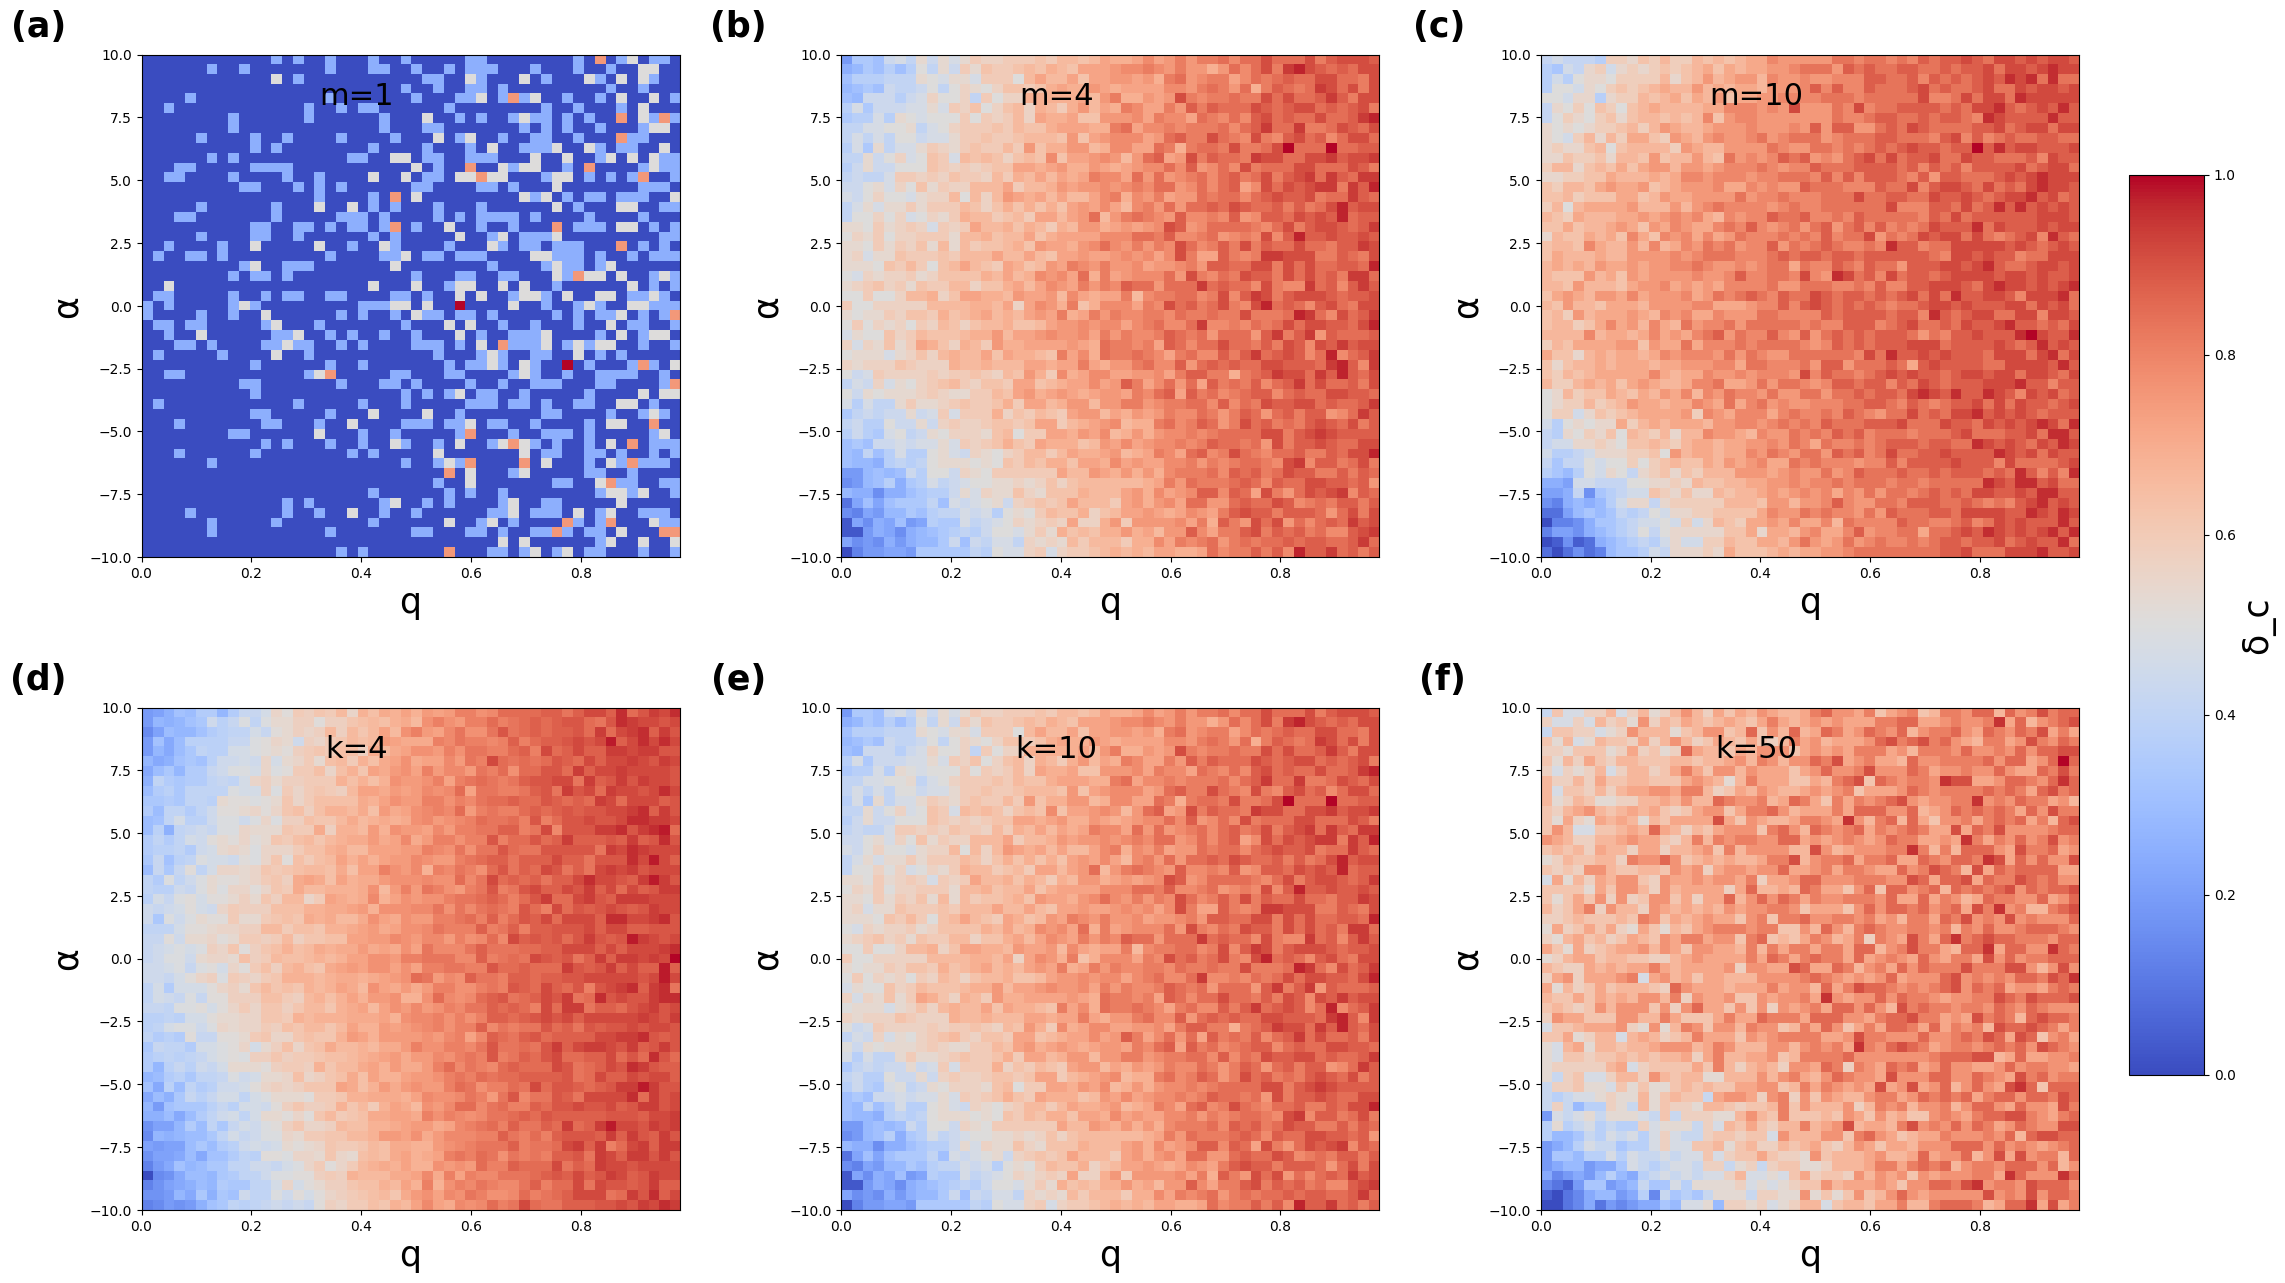

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 处理CSV并返回归一化的p_c网格
def process_csv(file_path):
    df = pd.read_csv(file_path)
    
    # 按 'p', 'q', 'alpha' 分组，并对 'TLP' 求平均
    df_grouped = df.groupby(['delta', 'q', 'alpha']).mean().reset_index()
    
    # 过滤所需的列
    df_filtered = df_grouped[['TLP', 'delta', 'q', 'alpha']]
    
    # 初始化字典存储 delta_c 值
    delta_c_dict = {'q': [], 'alpha': [], 'delta_c': []}
    
    # 遍历每一个 q 和 alpha 组合
    for q_value in df_filtered['q'].unique():
        for alpha_value in df_filtered['alpha'].unique():
            # 过滤出对应 q 和 alpha 的所有行
            subset = df_filtered[(df_filtered['q'] == q_value) & (df_filtered['alpha'] == alpha_value)].sort_values('delta')
            
            # 查找第一个 TLP >= 0.01 的 delta 值
            for _, row in subset.iterrows():
                if row['TLP'] >= 0.01:
                    delta_c_dict['q'].append(q_value)
                    delta_c_dict['alpha'].append(alpha_value)
                    delta_c_dict['delta_c'].append(row['delta'])
                    break  # 找到第一个符合条件的 delta 后停止

    # 转换为 DataFrame
    df_delta_c = pd.DataFrame(delta_c_dict)
    
    # 创建 q 和 alpha 的网格
    q_unique = np.sort(df_delta_c['q'].unique())
    alpha_unique = np.sort(df_delta_c['alpha'].unique())
    
    # 构建 delta_c 值的二维网格
    delta_c_grid = np.full((len(alpha_unique), len(q_unique)), np.nan)
    
    for i, alpha in enumerate(alpha_unique):
        for j, q in enumerate(q_unique):
            value = df_delta_c[(df_delta_c['q'] == q) & (df_delta_c['alpha'] == alpha)]['delta_c']
            if not value.empty:
                delta_c_grid[i, j] = value.values[0]
    
    # 归一化处理
    min_value = np.nanmin(delta_c_grid)
    max_value = np.nanmax(delta_c_grid)
    delta_c_normalized = (delta_c_grid - min_value) / (max_value - min_value)
    
    return delta_c_normalized, q_unique, alpha_unique

# CSV 文件路径
files = {
    'm=1': r'D:\VS code\project\Fig02-06\Fig06_result(m=1).csv',
    'm=4': r'D:\VS code\project\Fig02-06\Fig06_result.csv',
    'm=10': r'D:\VS code\project\Fig02-06\Fig06_result(m=10).csv',
    'k=4': r'D:\VS code\project\Fig02-06\Fig06_result(k=4).csv',
    'k=10': r'D:\VS code\project\Fig02-06\Fig06_result.csv',  # 需要时可重复使用baseline文件
    'k=50': r'D:\VS code\project\Fig02-06\Fig06_result(k=50).csv'
}

# 创建一个 2x3 的大图
fig, axes = plt.subplots(2, 3, figsize=(25, 15), gridspec_kw={'wspace': 0.3, 'hspace': 0.3})

# 设置每个子图的标签 (a) (b) ... (f) 在子图外部的左边
subplot_labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

# 标签和对应参数
label_mk = ['m=1', 'm=4', 'm=10', 'k=4', 'k=10', 'k=50']

# 遍历每个子图
for idx, ax in enumerate(axes.flat):
    # 处理CSV，获取归一化的delta_c网格，以及q和alpha的唯一值
    delta_c_normalized, q_unique, alpha_unique = process_csv(files[label_mk[idx]])
    
    # 绘制热力图
    heatmap = ax.imshow(delta_c_normalized, extent=[q_unique.min(), q_unique.max(), alpha_unique.min(), alpha_unique.max()],
                        origin='lower', cmap='coolwarm', aspect='auto')
    
    # 设置子图的标签（例如 (a)-(f)），并增加 m 或 k 的标签
    ax.text(0.4, 0.9, f'{label_mk[idx]}', transform=ax.transAxes, fontsize=22, horizontalalignment='center')
    
    # 设置坐标轴标签
    ax.set_xlabel('q', fontsize=25)
    ax.set_ylabel('α', fontsize=25)

# 遍历每个子图，添加标签到左边外面
for idx, ax in enumerate(axes.flat):
    pos = ax.get_position()
    fig.text(pos.x0 - 0.03, pos.y0 + pos.height + 0.03, 
             subplot_labels[idx], 
             fontsize=25, weight='bold', ha='right', va='top')

# 添加整个图的颜色条
cbar_ax = fig.add_axes([0.92, 0.2, 0.03, 0.6])
#fig.colorbar(heatmap, cax=cbar_ax, label='δ_c')
cbar = fig.colorbar(heatmap, cax=cbar_ax)

# 设置颜色条标签
cbar.set_label('δ_c')  # 设置颜色条标签
cbar.ax.yaxis.label.set_size(25)  # 调整颜色条标签的字体大小
# 显示图形
plt.show()


图6  模型参数对阈值点δ_c的影响情况
(a-c)转诊次数上限m对阈值点δ_c的影响，（d-f）平均度k对阈值点δ_c的影响；
从图6(a)发现当m=1时，随机转诊概率q和转诊偏好α对阈值点δ_c影响较小；随着m的增大，患者有更多的转诊机会，大大增加了转诊成功率，此时考虑转诊策略和转诊偏好才有意义，并且q值较小，无转诊偏好（α=0）时阈值点δ_c较大，q值较大时转诊偏好对阈值点δ_c的影响较小，如图6（b)(c)所示。考虑网络平均度k对阈值点δ_c的影响时，如图6（d-f)，随着平均度k的增加，医院医生之间的关系更加紧密，当k很大很大时，此时患者共享网络近似于一个完全连接网络，此时随机转诊概率q对阈值点δ_c的影响会显著降低，并且患者无转诊偏好有利于缓解部分医生就诊压力，医疗资源分配更加合理，相应地表现出阈值点δ_c也较大。

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 处理CSV并返回归一化的p_c网格
def process_csv(file_path):
    df = pd.read_csv(file_path)
    
    # 按 'p', 'q', 'alpha' 分组，并对 'TLP' 求平均
    df_grouped = df.groupby(['delta', 'q', 'alpha']).mean().reset_index()
    
    # 过滤所需的列
    df_filtered = df_grouped[['TLP', 'delta', 'q', 'alpha']]
    
    # 初始化字典存储 delta_c 值
    delta_c_dict = {'q': [], 'alpha': [], 'delta_c': []}
    
    # 遍历每一个 q 和 alpha 组合
    for q_value in df_filtered['q'].unique():
        for alpha_value in df_filtered['alpha'].unique():
            # 过滤出对应 q 和 alpha 的所有行
            subset = df_filtered[(df_filtered['q'] == q_value) & (df_filtered['alpha'] == alpha_value)].sort_values('delta')
            
            # 查找第一个 TLP >= 0.01 的 delta 值
            for _, row in subset.iterrows():
                if row['TLP'] >= 0.01:
                    delta_c_dict['q'].append(q_value)
                    delta_c_dict['alpha'].append(alpha_value)
                    delta_c_dict['delta_c'].append(row['delta'])
                    break  # 找到第一个符合条件的 delta 后停止

    # 转换为 DataFrame
    df_delta_c = pd.DataFrame(delta_c_dict)
    
    # 创建 q 和 alpha 的网格
    q_unique = np.sort(df_delta_c['q'].unique())
    alpha_unique = np.sort(df_delta_c['alpha'].unique())
    
    # 构建 delta_c 值的二维网格
    delta_c_grid = np.full((len(alpha_unique), len(q_unique)), np.nan)
    
    for i, alpha in enumerate(alpha_unique):
        for j, q in enumerate(q_unique):
            value = df_delta_c[(df_delta_c['q'] == q) & (df_delta_c['alpha'] == alpha)]['delta_c']
            if not value.empty:
                delta_c_grid[i, j] = value.values[0]
    
    # 归一化处理
    min_value = np.nanmin(delta_c_grid)
    max_value = np.nanmax(delta_c_grid)
    delta_c_normalized = (delta_c_grid - min_value) / (max_value - min_value)
    
    return delta_c_normalized, q_unique, alpha_unique

# CSV 文件路径
files = {
    'm=1': r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result(m=1).csv',
    'm=4': r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result.csv',
    'm=10': r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result(m=10).csv',
    'k=4': r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result(k=4).csv',
    'k=10': r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result.csv',  # 需要时可重复使用baseline文件
    'k=50': r'D:\VS code\project\Fig02-06\simulation_results\Fig06_result(k=50).csv'
}

# 创建一个 2x3 的大图
fig, axes = plt.subplots(2, 3, figsize=(25, 15), gridspec_kw={'wspace': 0.3, 'hspace': 0.3})

# 设置每个子图的标签 (a) (b) ... (f) 在子图外部的左边
subplot_labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

# 标签和对应参数
label_mk = ['m=1', 'm=4', 'm=10', 'k=4', 'k=10', 'k=50']



# 遍历每个子图
for idx, ax in enumerate(axes.flat):
    # 处理CSV，获取归一化的delta_c网格，以及q和alpha的唯一值
    delta_c_normalized, q_unique, alpha_unique = process_csv(files[label_mk[idx]])
    
    # 绘制热力图
    heatmap = ax.imshow(delta_c_normalized, extent=[q_unique.min(), q_unique.max(), alpha_unique.min(), alpha_unique.max()],
                        origin='lower', cmap='coolwarm', aspect='auto')
    
    # 设置子图的标签（例如 (a)-(f)），并增加 m 或 k 的标签
    ax.text(0.45, 0.8, f'{label_mk[idx]}', transform=ax.transAxes, fontsize=23, horizontalalignment='center')
    
    # 设置坐标轴标签
    ax.set_xlabel('q', fontsize=25)
    ax.set_ylabel('α', fontsize=25)
    ax.tick_params(axis='both', which='major', labelsize=20)

# 遍历每个子图，添加标签到左边外面
for idx, ax in enumerate(axes.flat):
    pos = ax.get_position()
    fig.text(pos.x0 - 0.03, pos.y0 + pos.height + 0.03, 
             subplot_labels[idx], 
             fontsize=25, weight='bold', ha='right', va='top')

# 添加整个图的颜色条
cbar_ax = fig.add_axes([0.92, 0.2, 0.03, 0.6])
#fig.colorbar(heatmap, cax=cbar_ax, label='δ_c')
cbar = fig.colorbar(heatmap, cax=cbar_ax)

# 设置颜色条标签
cbar.set_label('δ_c')  # 设置颜色条标签
cbar.ax.yaxis.label.set_size(25)  # 调整颜色条标签的字体大小
cbar.ax.tick_params(labelsize=20)

# 保存为PDF格式
plt.savefig(r'D:\VS code\project\Fig02-06\Fig06.pdf', format='pdf')
# 显示图形
plt.show()
